# Simulation

Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import simulations
import unfold_utils 

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


  Activating project at `~/Projects/neuroNoodle/simulation`


Status `~/Projects/neuroNoodle/simulation/Project.toml`
  [a93c6f00] DataFrames v1.7.0
  [181c99d8] Unfold v0.7.6
None
  [ec0f67a1] UnfoldDecode v0.1.0 `https://github.com/unfoldtoolbox/UnfoldDecode.jl#main`


    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Projects/neuroNoodle/simulation/Project.toml`
  No Changes to `~/Projects/neuroNoodle/simulation/Manifest.toml`
Precompiling project...
  ✓ NNlib → NNlibFFTWExt
  1 dependency successfully precompiled in 5 seconds. 229 already precompiled.
   Resolving package versions...
  No Changes to `~/Projects/neuroNoodle/simulation/Project.toml`
  No Changes to `~/Projects/neuroNoodle/simulation/Manifest.toml`
Precompiling project...
  ✓ NNlib → NNlibForwardDiffExt
  ✓ MLUtils
  ✓ StatisticalMeasuresBase
  ✓ MLJEnsembles
  ✓ MLJBase
  ✓ StatisticalMeasures
  ✓ StatisticalMeasures → ScientificTypesExt
  ✓ MLJBase → DefaultMeasuresExt
  ✓ MLJFlow
  ✓ MLJTuning
  ✓ MLJBalancing
  ✓ MLJIteration
  ✓ MLJ
  ✓ UnfoldDecode
  14 dependencies successfully precompiled in 25 seconds. 216 already precompiled.
    Updating git-repo `https://github.com/unfoldtoolbox/UnfoldDecode.jl`
   Resolving pac

Config

SRI mean: 0.15


<Figure size 640x480 with 0 Axes>

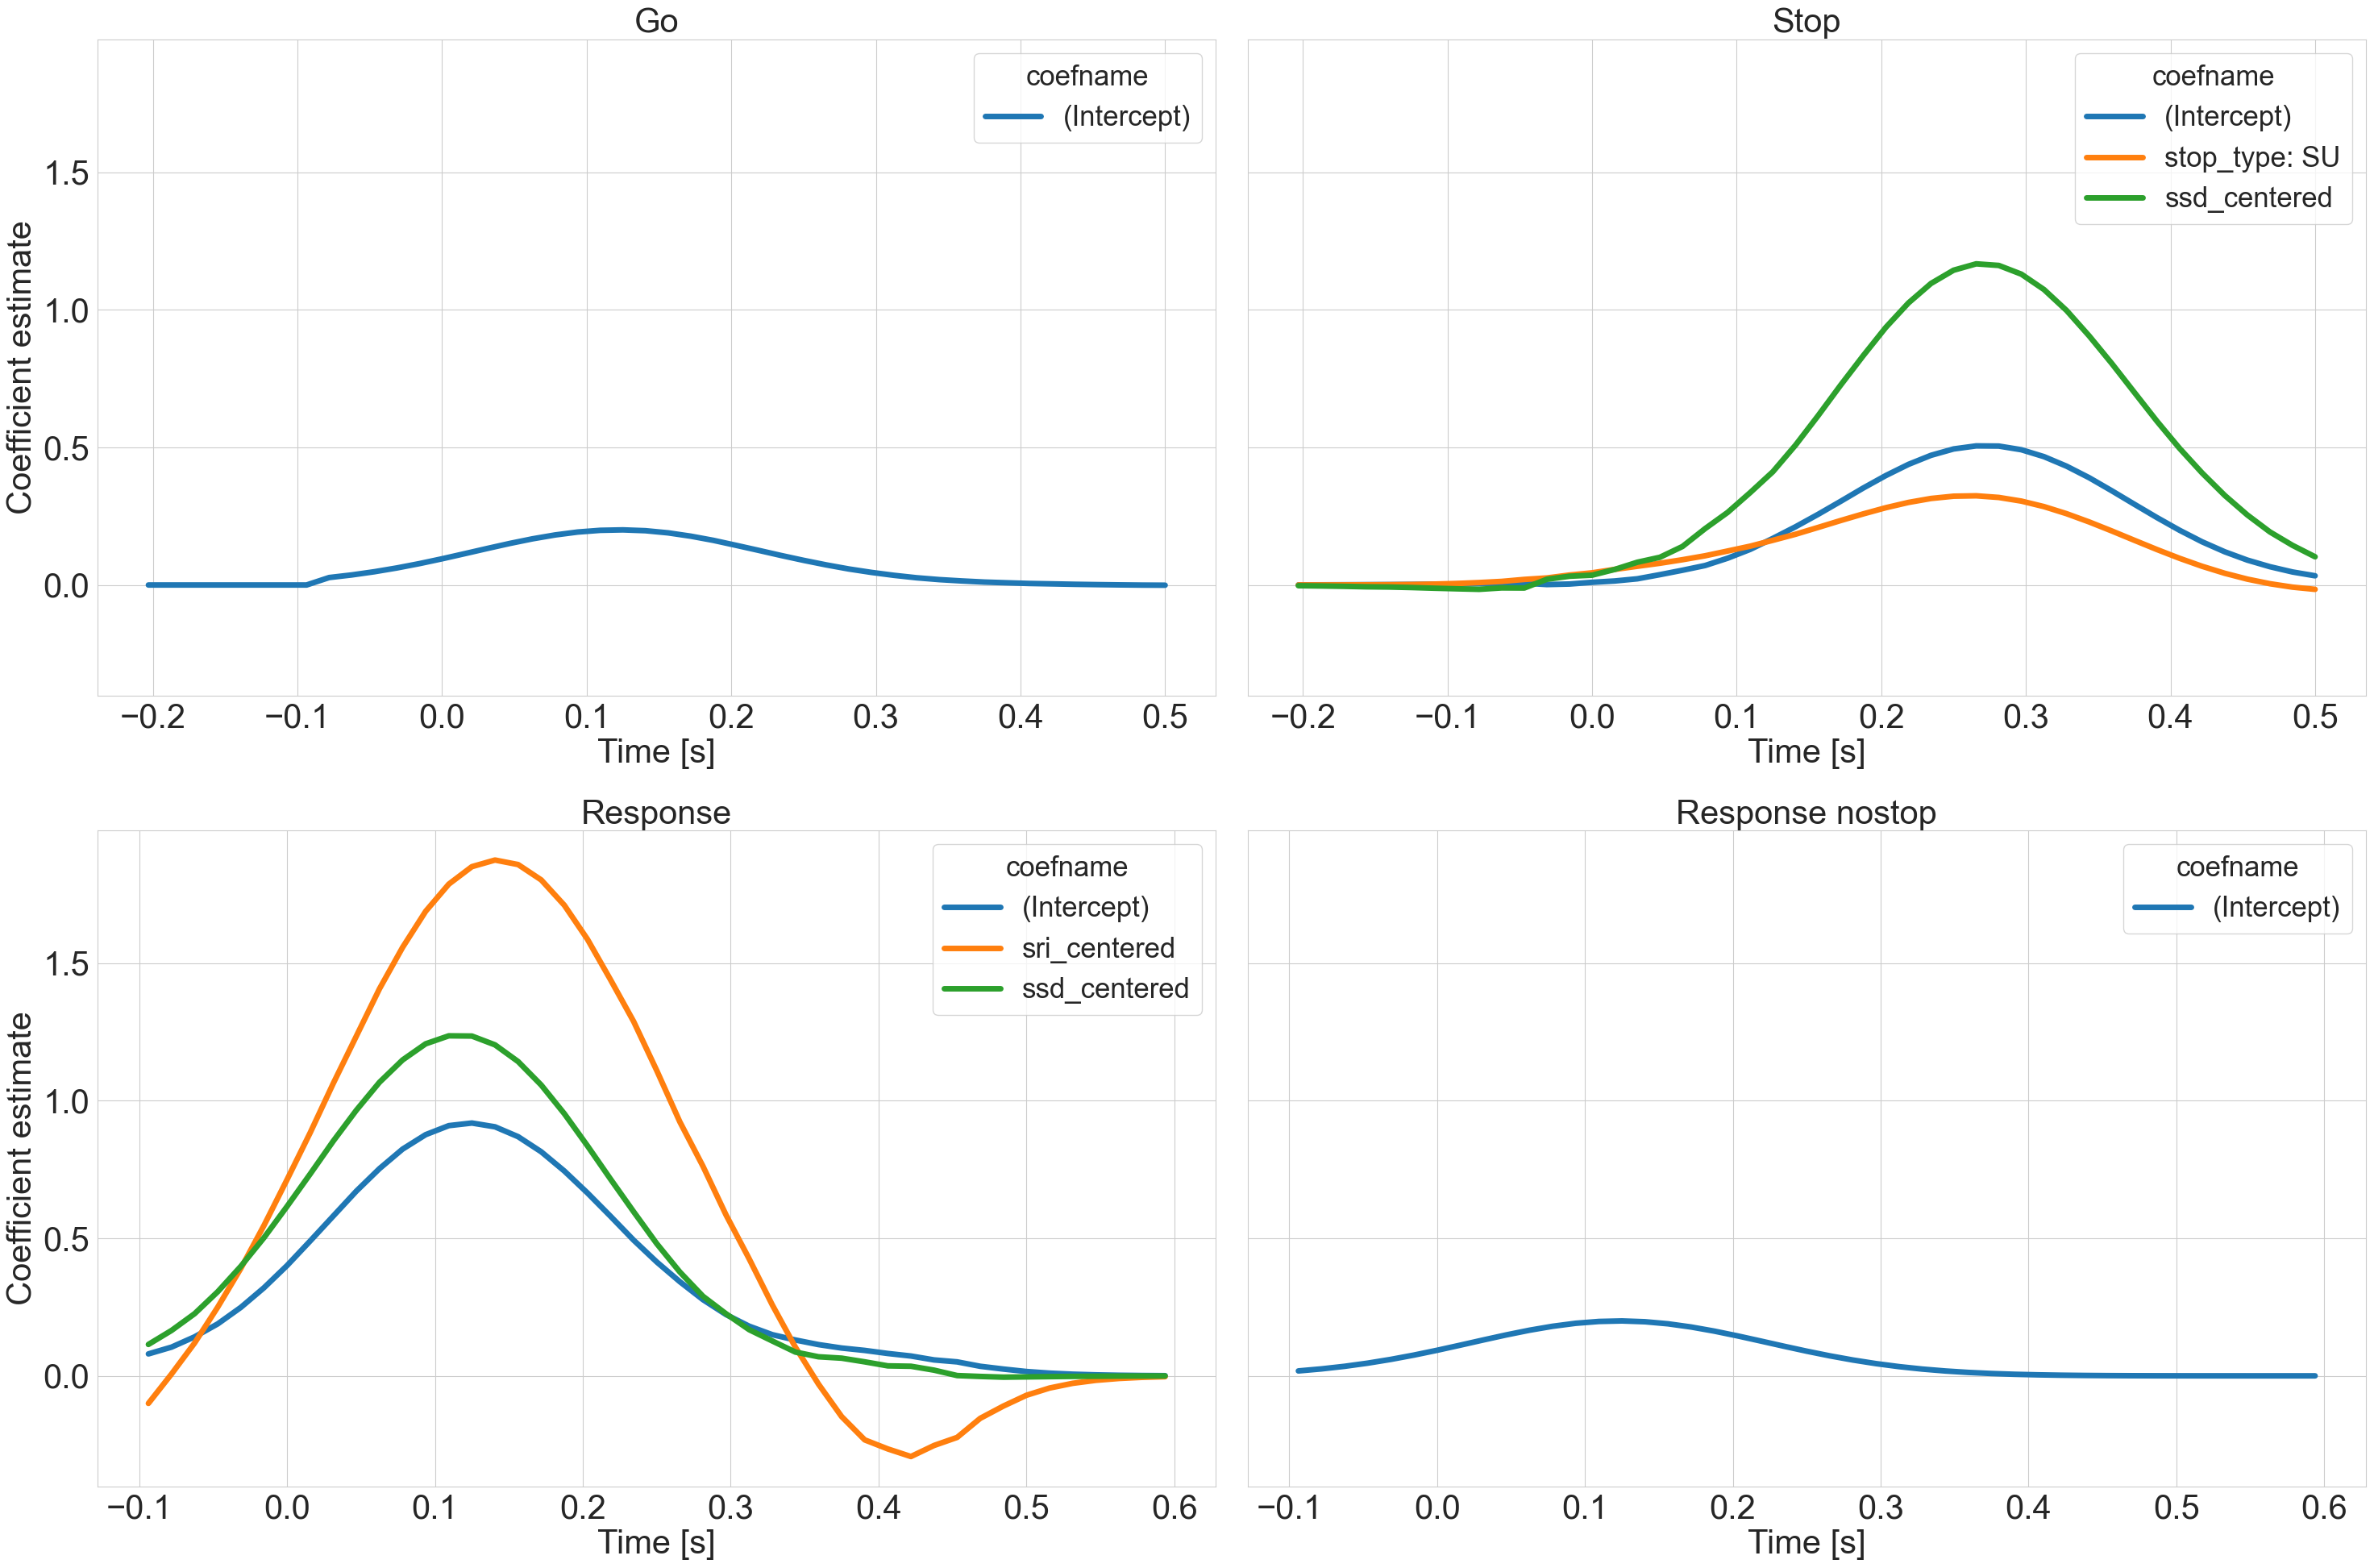

SRI mean: 0.2


<Figure size 640x480 with 0 Axes>

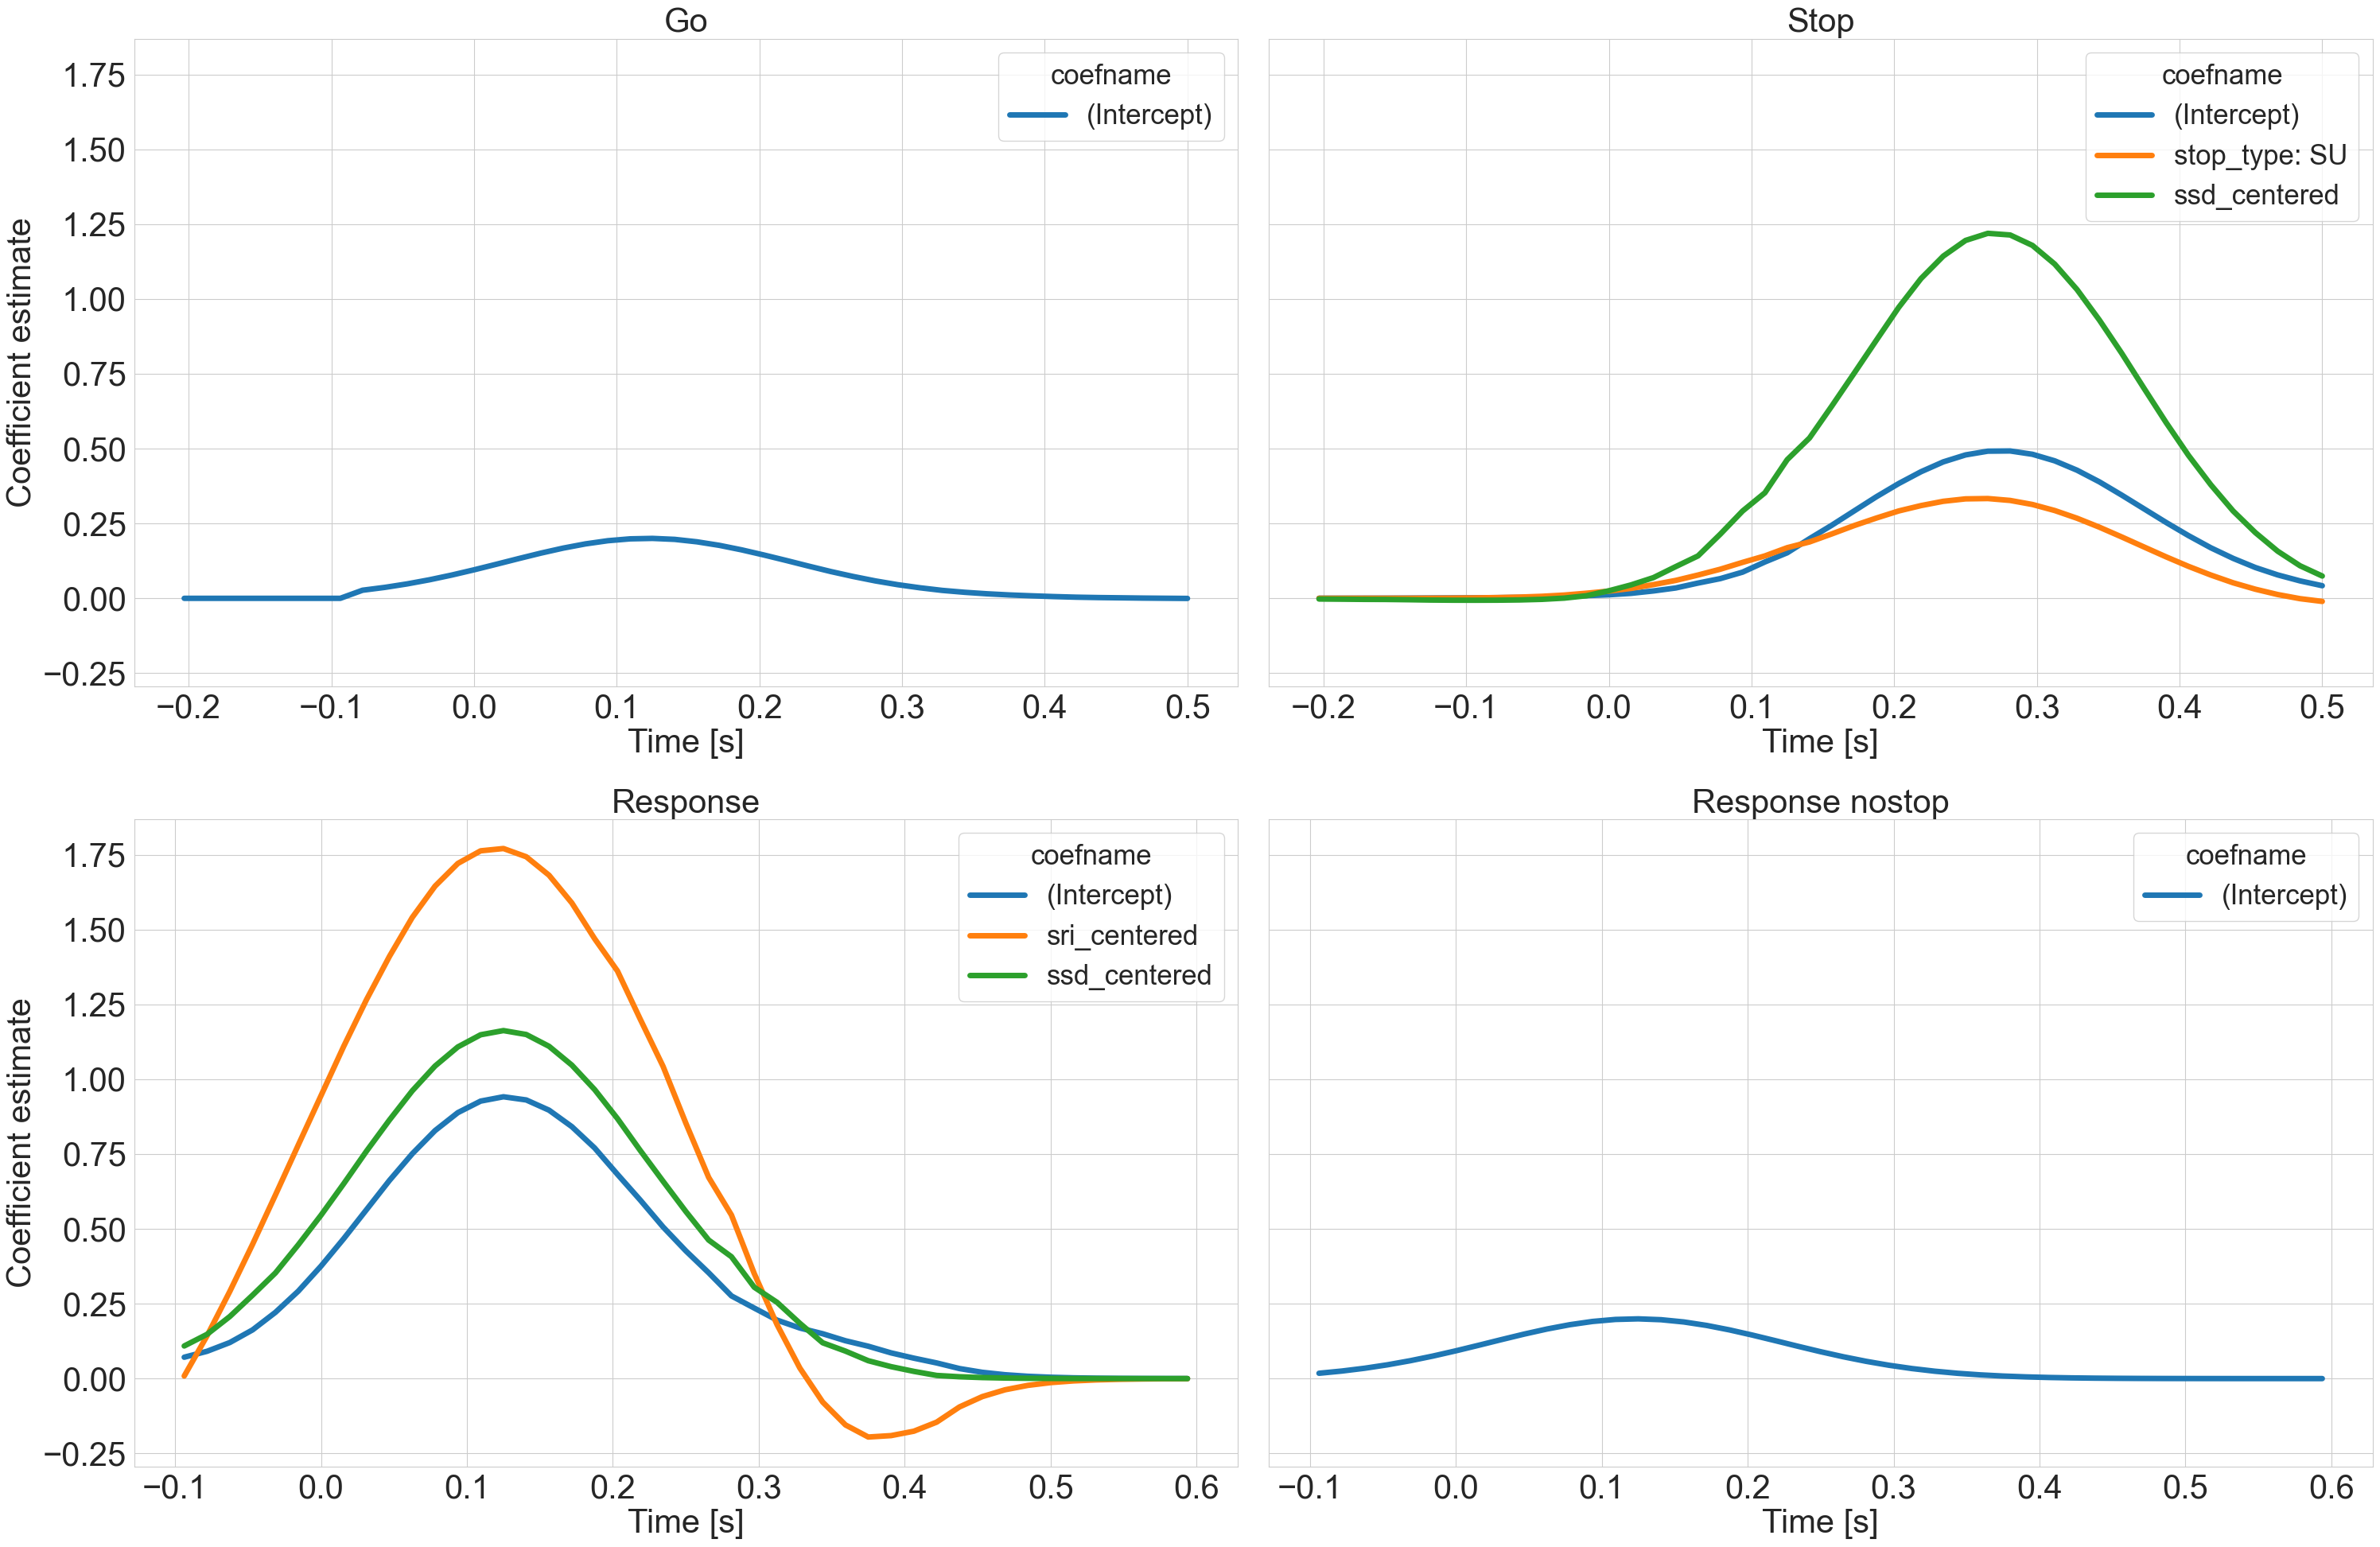

SRI mean: 0.3


<Figure size 640x480 with 0 Axes>

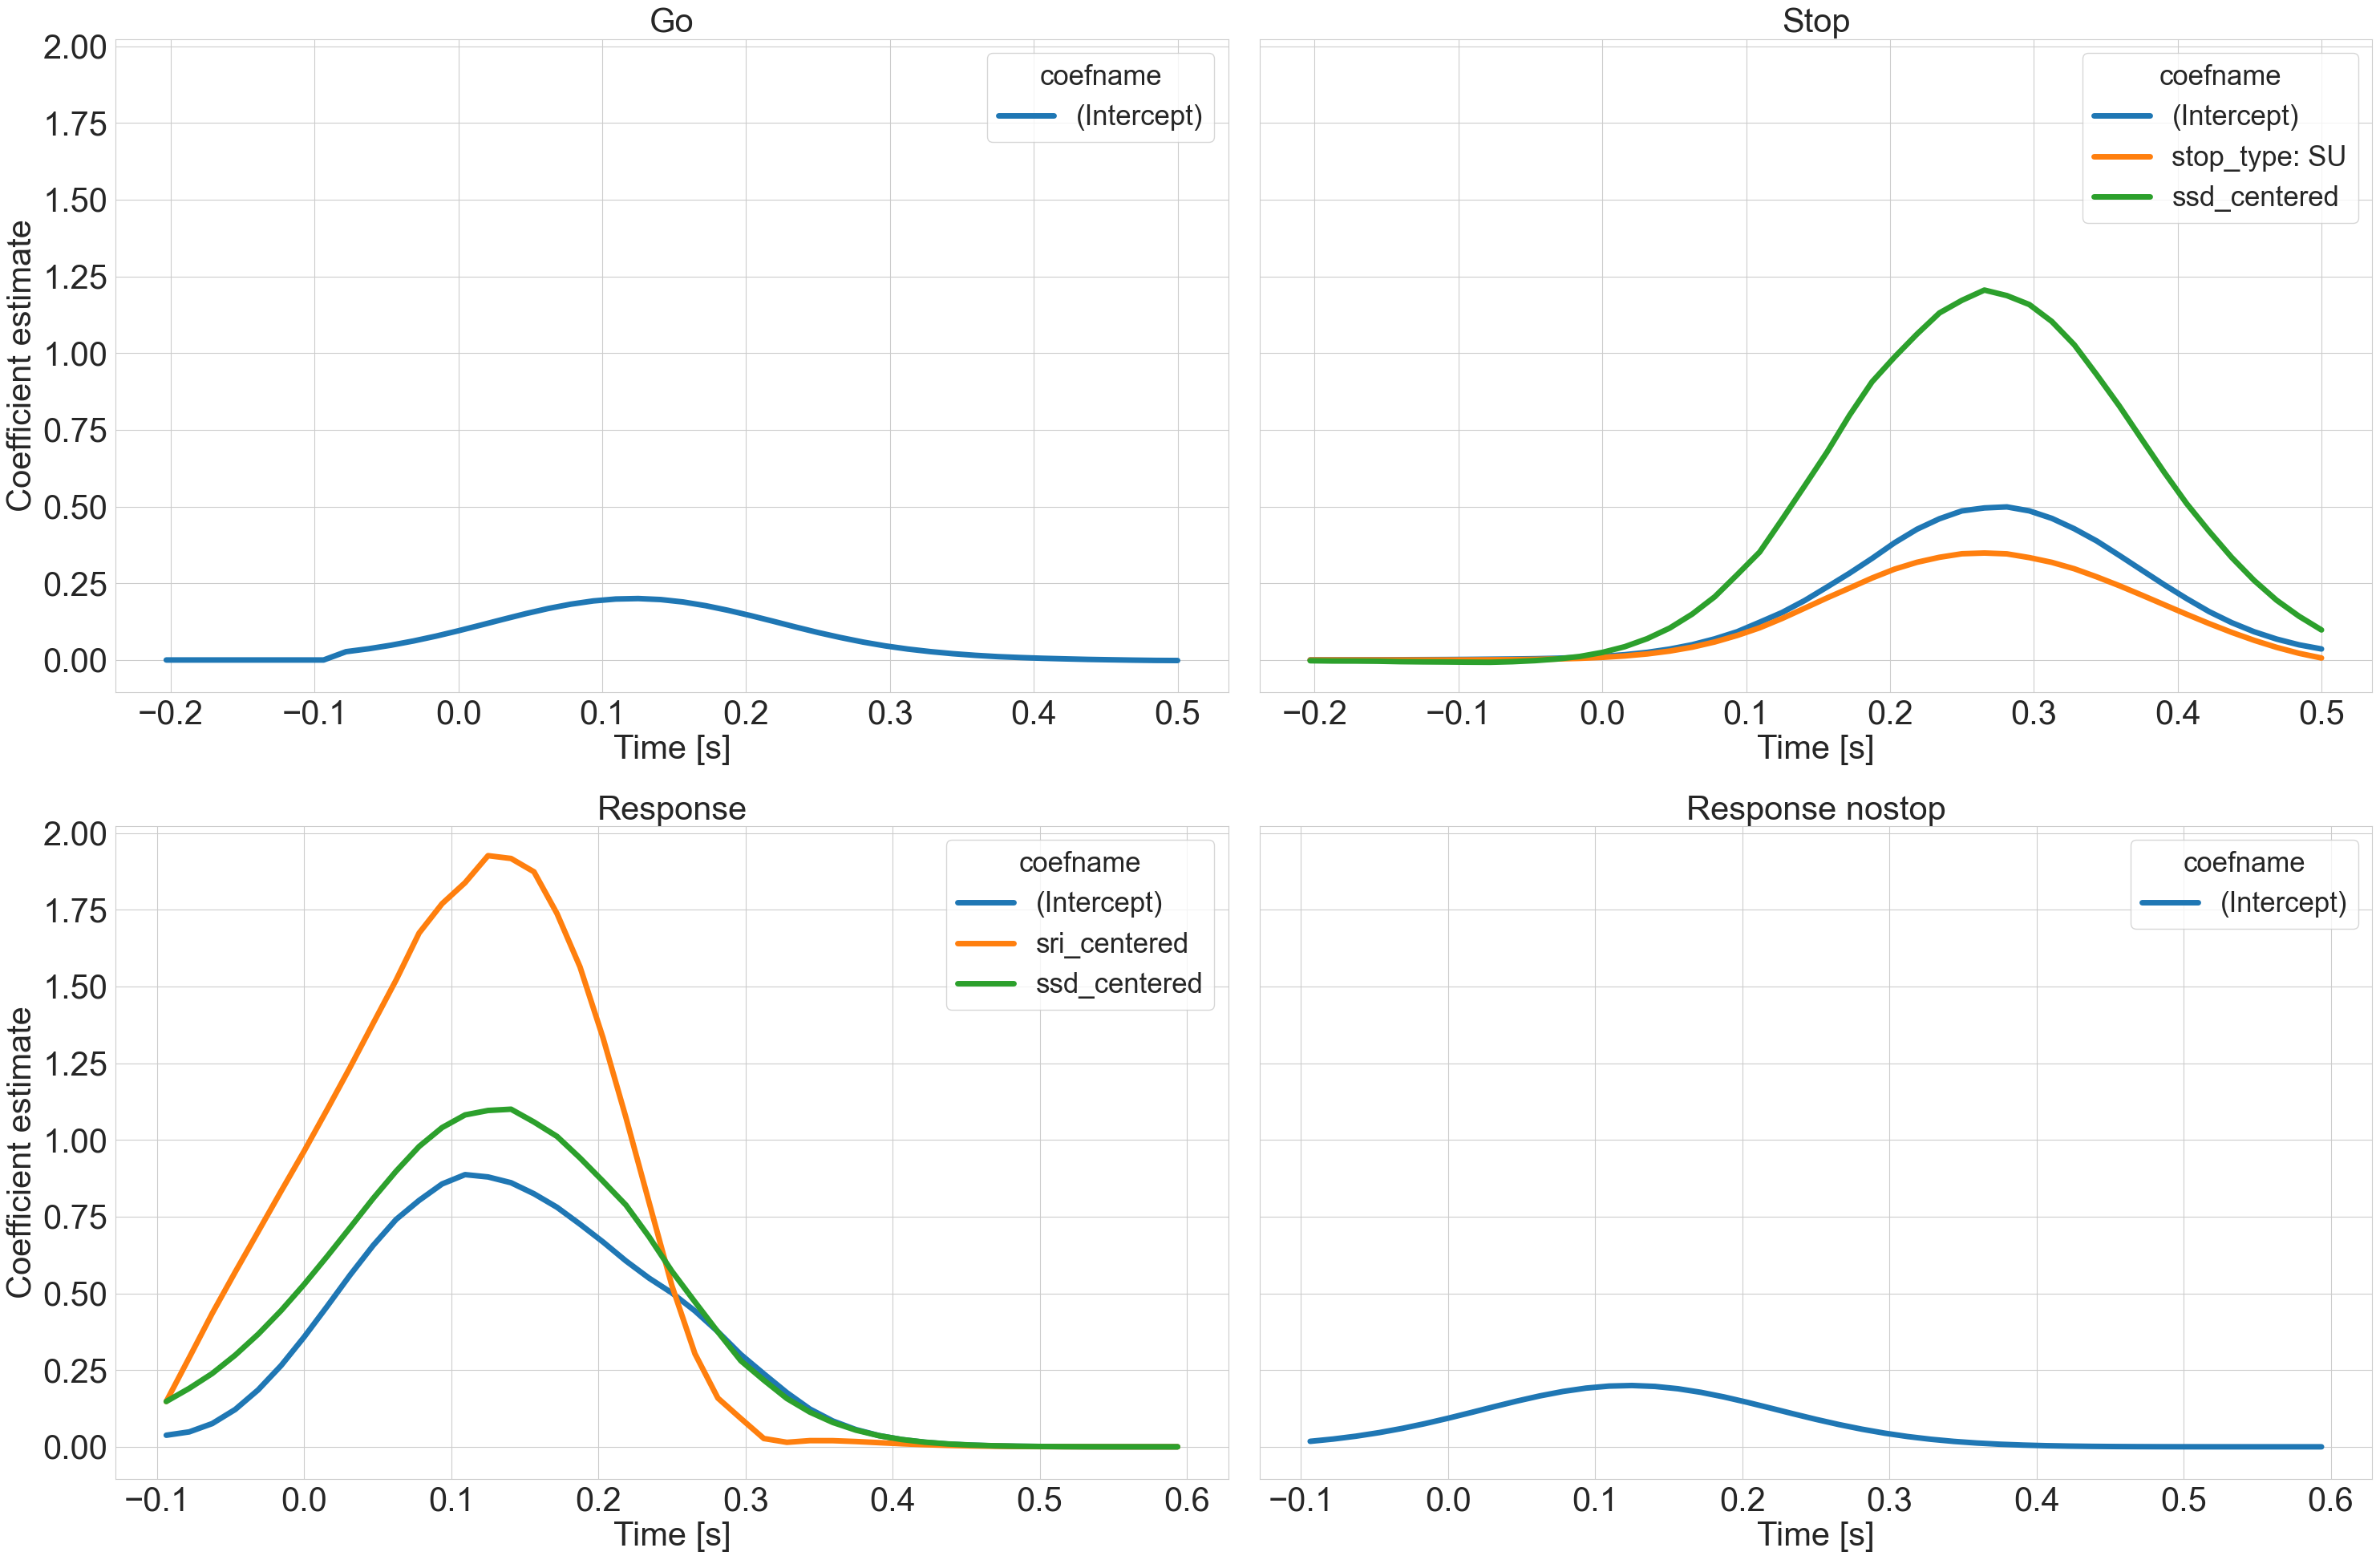

SRI mean: 0.4


<Figure size 640x480 with 0 Axes>

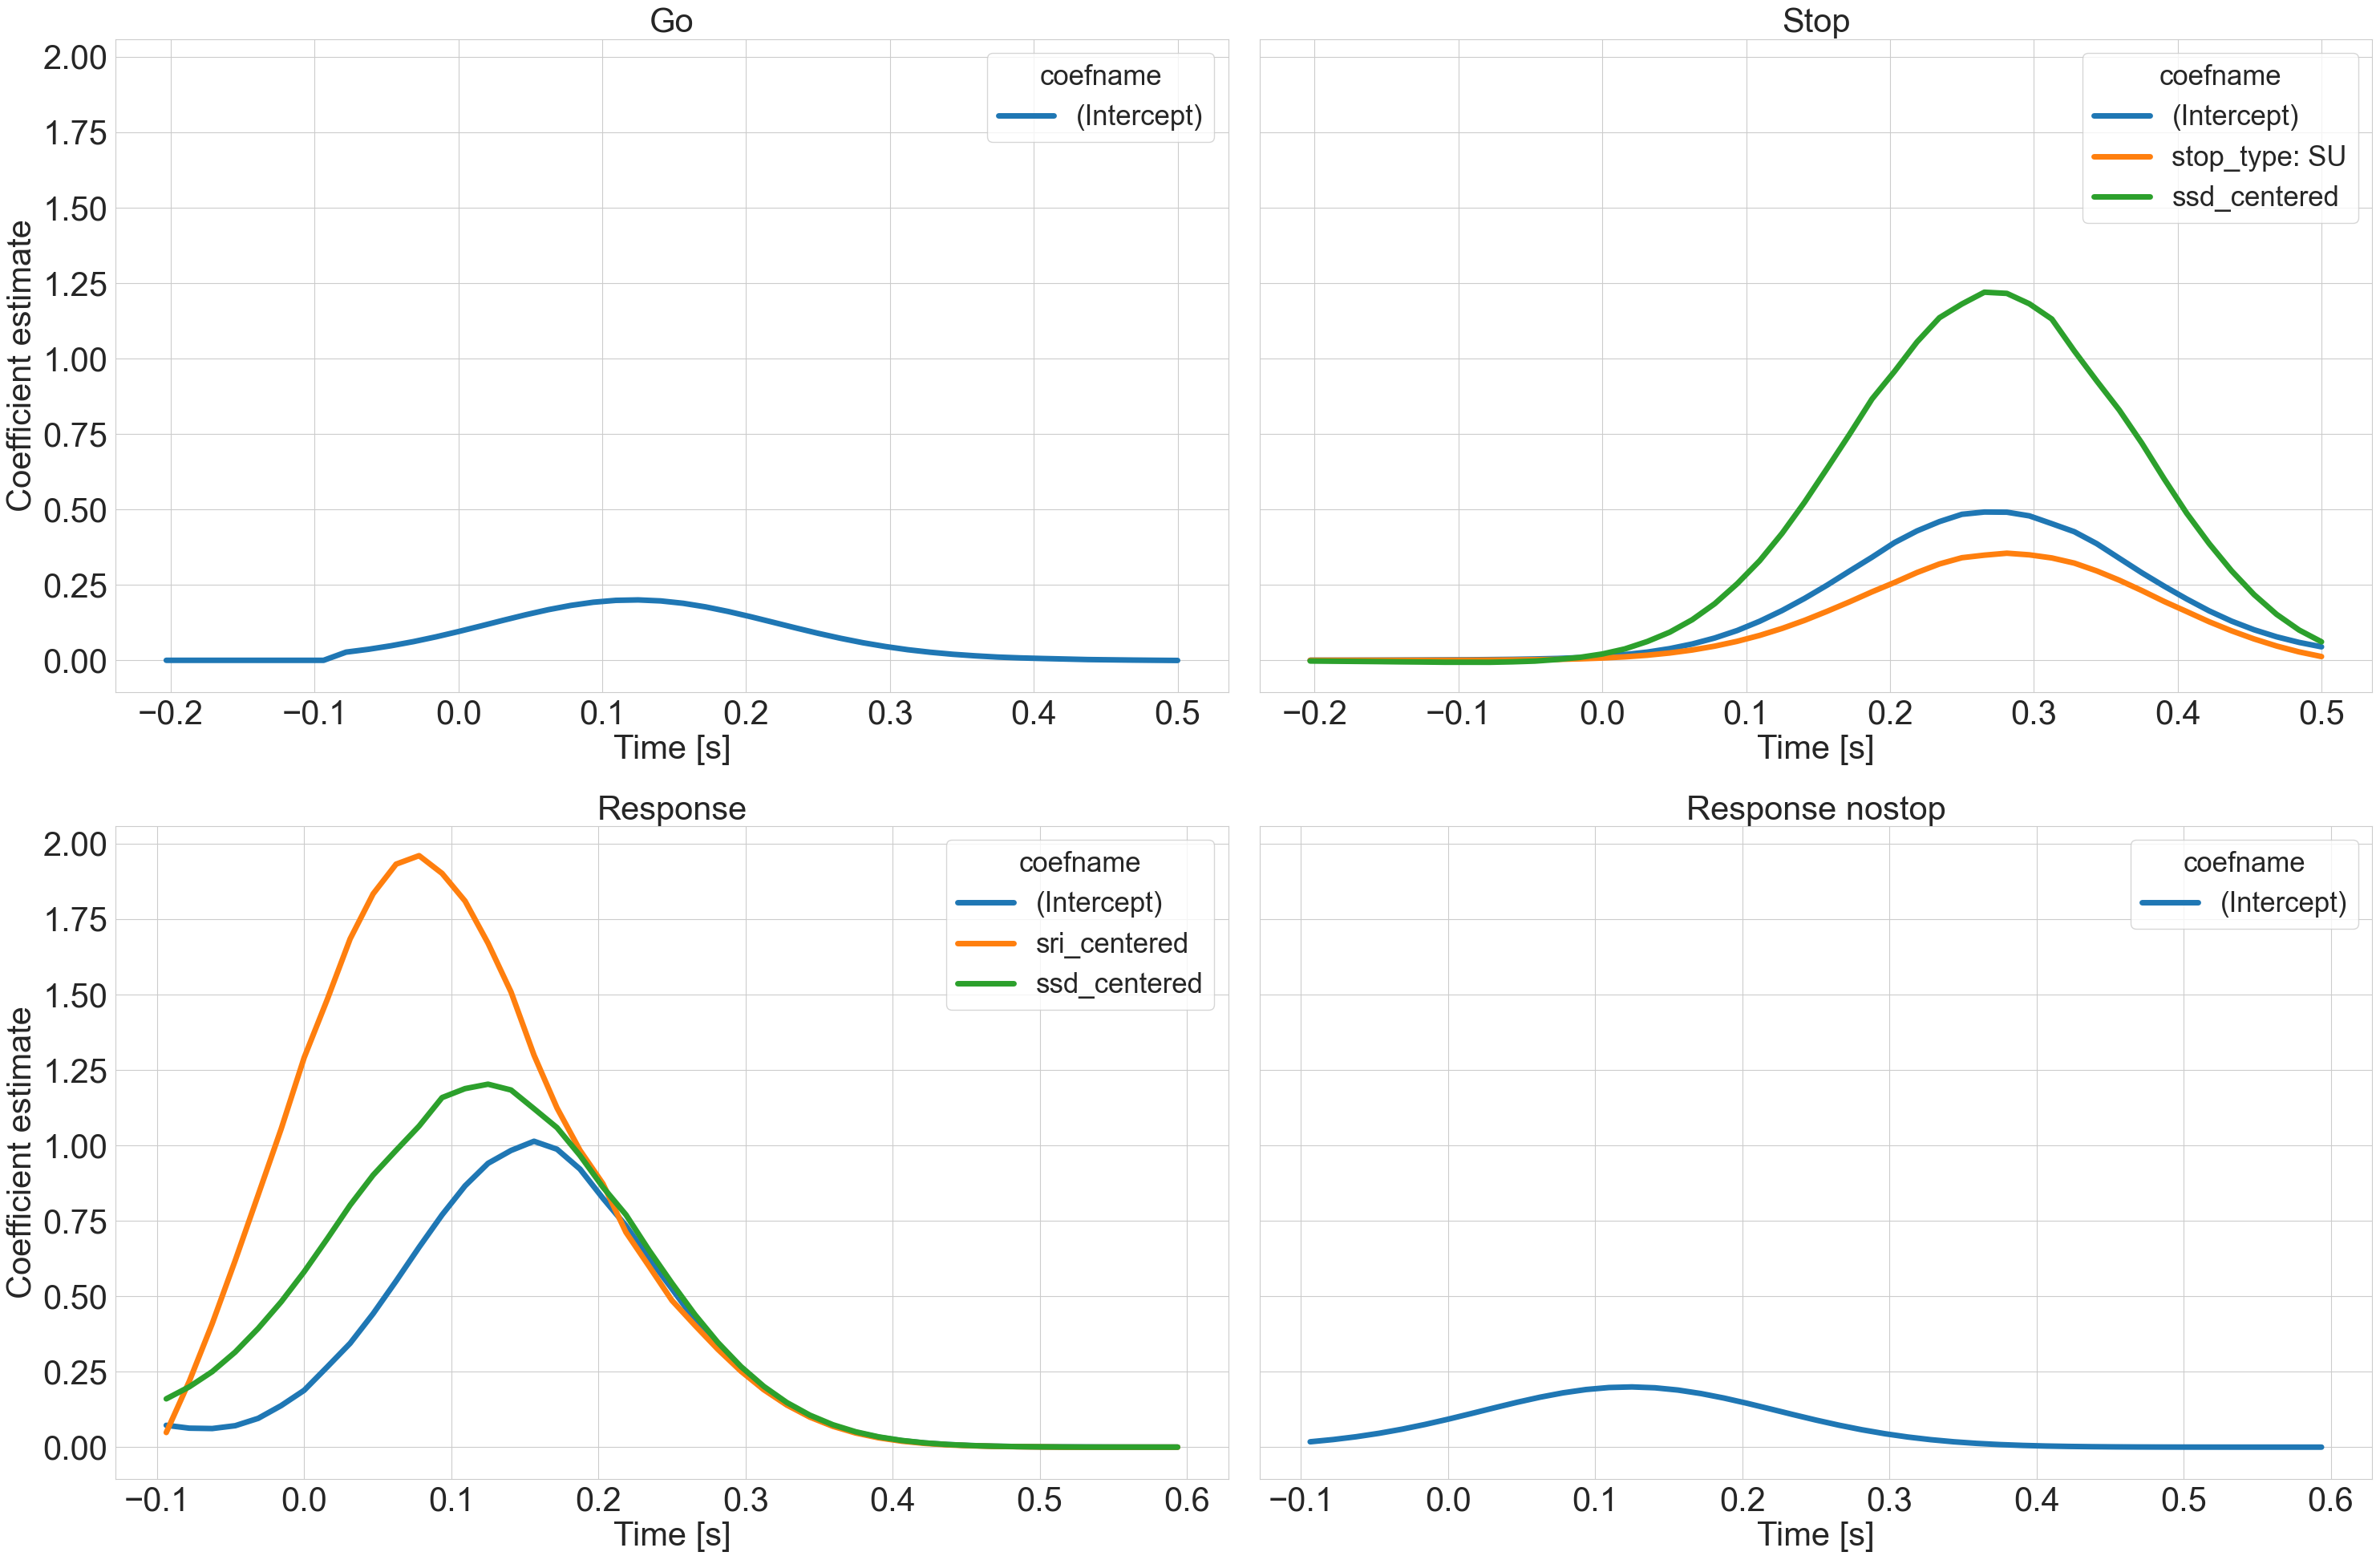

SRI mean: 0.5


<Figure size 640x480 with 0 Axes>

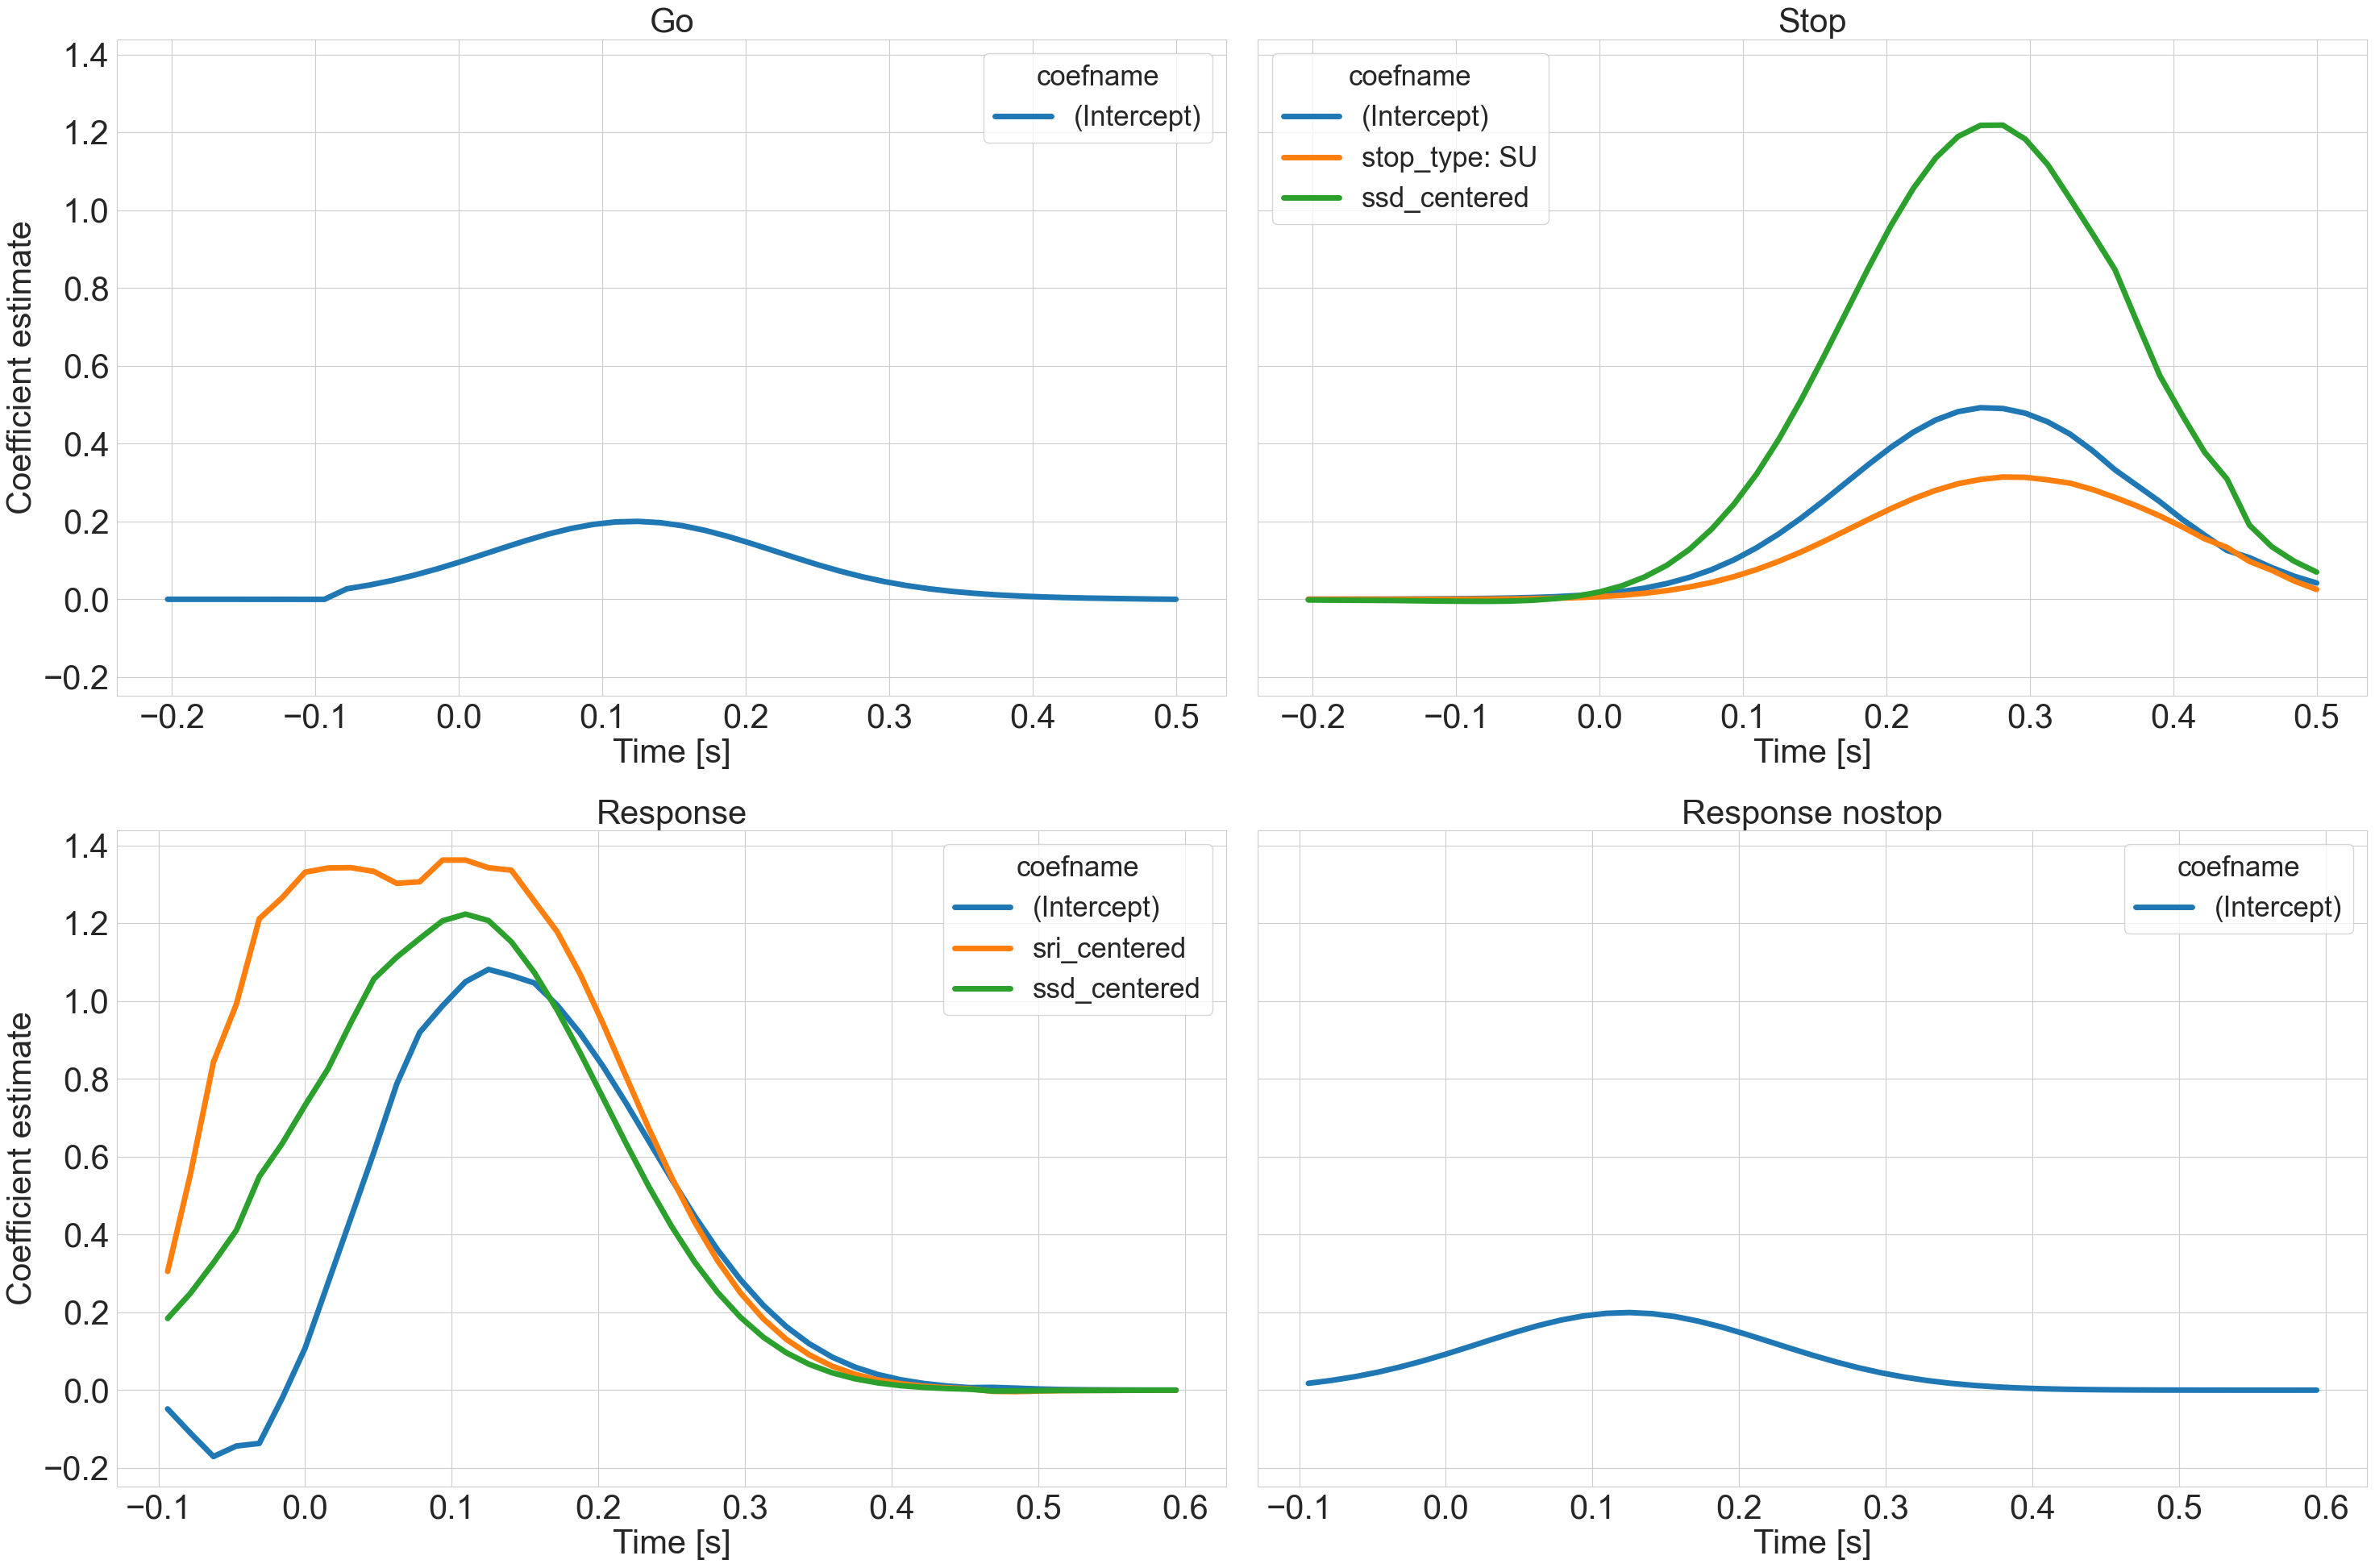

latency            event  SSD  SRI stop_type   response_type
0         6.0               go  NaN  NaN       n-a  nostop_correct
1        45.0  response_nostop  NaN  NaN       n-a  nostop_correct
2       102.0               go  NaN  NaN       n-a  nostop_correct
3       118.0  response_nostop  NaN  NaN       n-a  nostop_correct
4       198.0               go  NaN  NaN       n-a  nostop_correct
...       ...              ...  ...  ...       ...             ...
1503  66959.0  response_nostop  NaN  NaN       n-a  nostop_correct
1504  67014.0               go  NaN  NaN       n-a  nostop_correct
1505  67044.0  response_nostop  NaN  NaN       n-a  nostop_correct
1506  67110.0               go  NaN  NaN       n-a  nostop_correct
1507  67141.0  response_nostop  NaN  NaN       n-a  nostop_correct

[1508 rows x 6 columns]

In [7]:
# Parameters
n_trials_per_ssd = 100
distances_C_A = np.arange(0.1, 0.4, 0.05)
sampling_rate = 64
noise_level = 0
duration=1.5


sri_means = [0.15, 0.2, 0.3, 0.4, 0.5]

for i, sri_mean in enumerate(sri_means):
    config = {
        'go_intercept': 0.2,
        'stop_intercept': 0.5,
        'response_intercept':
            {
                'error': 1,
                'correct_nostop':0.2
            },
        'interactions': {
            'stop x SSD': True,
            'response_error x SSD': True,
            'response_error x SRI': True,
        },
        'probability': {
            'stop': 0.3,
            'error': 0.5,
    
        },
        'sri': {'loc': sri_mean, 'scale': 0.05}
    }

    # Simulate ERP components with conditions
    erp_trials, data_df = simulations.simulate_erp_components_with_conditions_test(
        n_trials_per_ssd,
        distances_C_A,
        config,
        sampling_rate,
        noise_level,
        duration=duration,
        stop_diff=True,
        remove_ern=False,
        stop_component_offset = 0.15,
    )

    # create Unfold events dataset
    events_df = simulations.create_events_table(data_df, duration, sampling_rate)

    # perform unfolding
    results = unfold_utils.perform_unfold(events_df, erp_trials)

    # plot results
    print(f'SRI mean: {sri_mean}')
    plt.figure(i)
    unfold_utils.plot_unfold_results_sst(results)

In [3]:
data_df

signal  SSD       SRI  \
0    [0.027067056662093164, 0.0365474105338472, 0.0...  NaN       NaN   
1    [0.02706705664732426, 0.036547410491428775, 0....  NaN       NaN   
2    [0.027067056647322604, 0.03654741049142304, 0....  NaN       NaN   
3    [0.027067056647322545, 0.03654741049142282, 0....  NaN       NaN   
4    [0.02706705664736797, 0.03654741049157066, 0.0...  NaN       NaN   
..                                                 ...  ...       ...   
695  [0.027067056647333037, 0.036547410491457995, 0...  NaN       NaN   
696  [0.0270670566481036, 0.03654741049391351, 0.04...  0.4  0.291345   
697  [0.027067056647322545, 0.03654741049142283, 0....  NaN       NaN   
698  [0.027067057658736033, 0.03654741311601508, 0....  NaN       NaN   
699  [0.027067056662769443, 0.03654741053574418, 0....  NaN       NaN   

     Go amplitude  Stop amplitude  Response amplitude  Go event latency  \
0             0.2             NaN            0.200000                 6   
1             0.2             NaN            0.200000                 6   
2             0.2             NaN            0.200000                 6   
3             0.2             NaN            0.200000                 6   
4             0.2             NaN            0.200000                 6   
..            ...             ...                 ...               ...   
695           0.2             NaN            0.200000                 6   
696           0.2            1.28            1.917018                 6   
697           0.2             NaN            0.200000                 6   
698           0.2             NaN            0.200000                 6   
699           0.2             NaN            0.200000                 6   

     Stop event latency  Response event latency stop_type   response_type  \
0                   NaN                    37.0    nostop  nostop_correct   
1                   NaN                    45.0    nostop  nostop_correct   
2                   NaN                    47.0    nostop  nostop_correct   
3                   NaN                    49.0    nostop  nostop_correct   
4                   NaN                    42.0    nostop  nostop_correct   
..                  ...                     ...       ...             ...   
695                 NaN                    43.0    nostop  nostop_correct   
696                32.0                    50.0      stop           error   
697                 NaN                    49.0    nostop  nostop_correct   
698                 NaN                    33.0    nostop  nostop_correct   
699                 NaN                    37.0    nostop  nostop_correct   

           rt  peak_center_go  peak_center_stop  peak_center_response  
0    0.483066             0.2               NaN              0.683066  
1    0.604845             0.2               NaN              0.804845  
2    0.645080             0.2               NaN              0.845080  
3    0.678947             0.2               NaN              0.878947  
4    0.563062             0.2               NaN              0.763062  
..        ...             ...               ...                   ...  
695  0.582028             0.2               NaN              0.782028  
696  0.791345             0.2              0.75              0.891345  
697  0.674713             0.2               NaN              0.874713  
698  0.418102             0.2               NaN              0.618102  
699  0.482410             0.2               NaN              0.682410  

[700 rows x 15 columns]

---

SRI mean: 0.2


<Figure size 640x480 with 0 Axes>

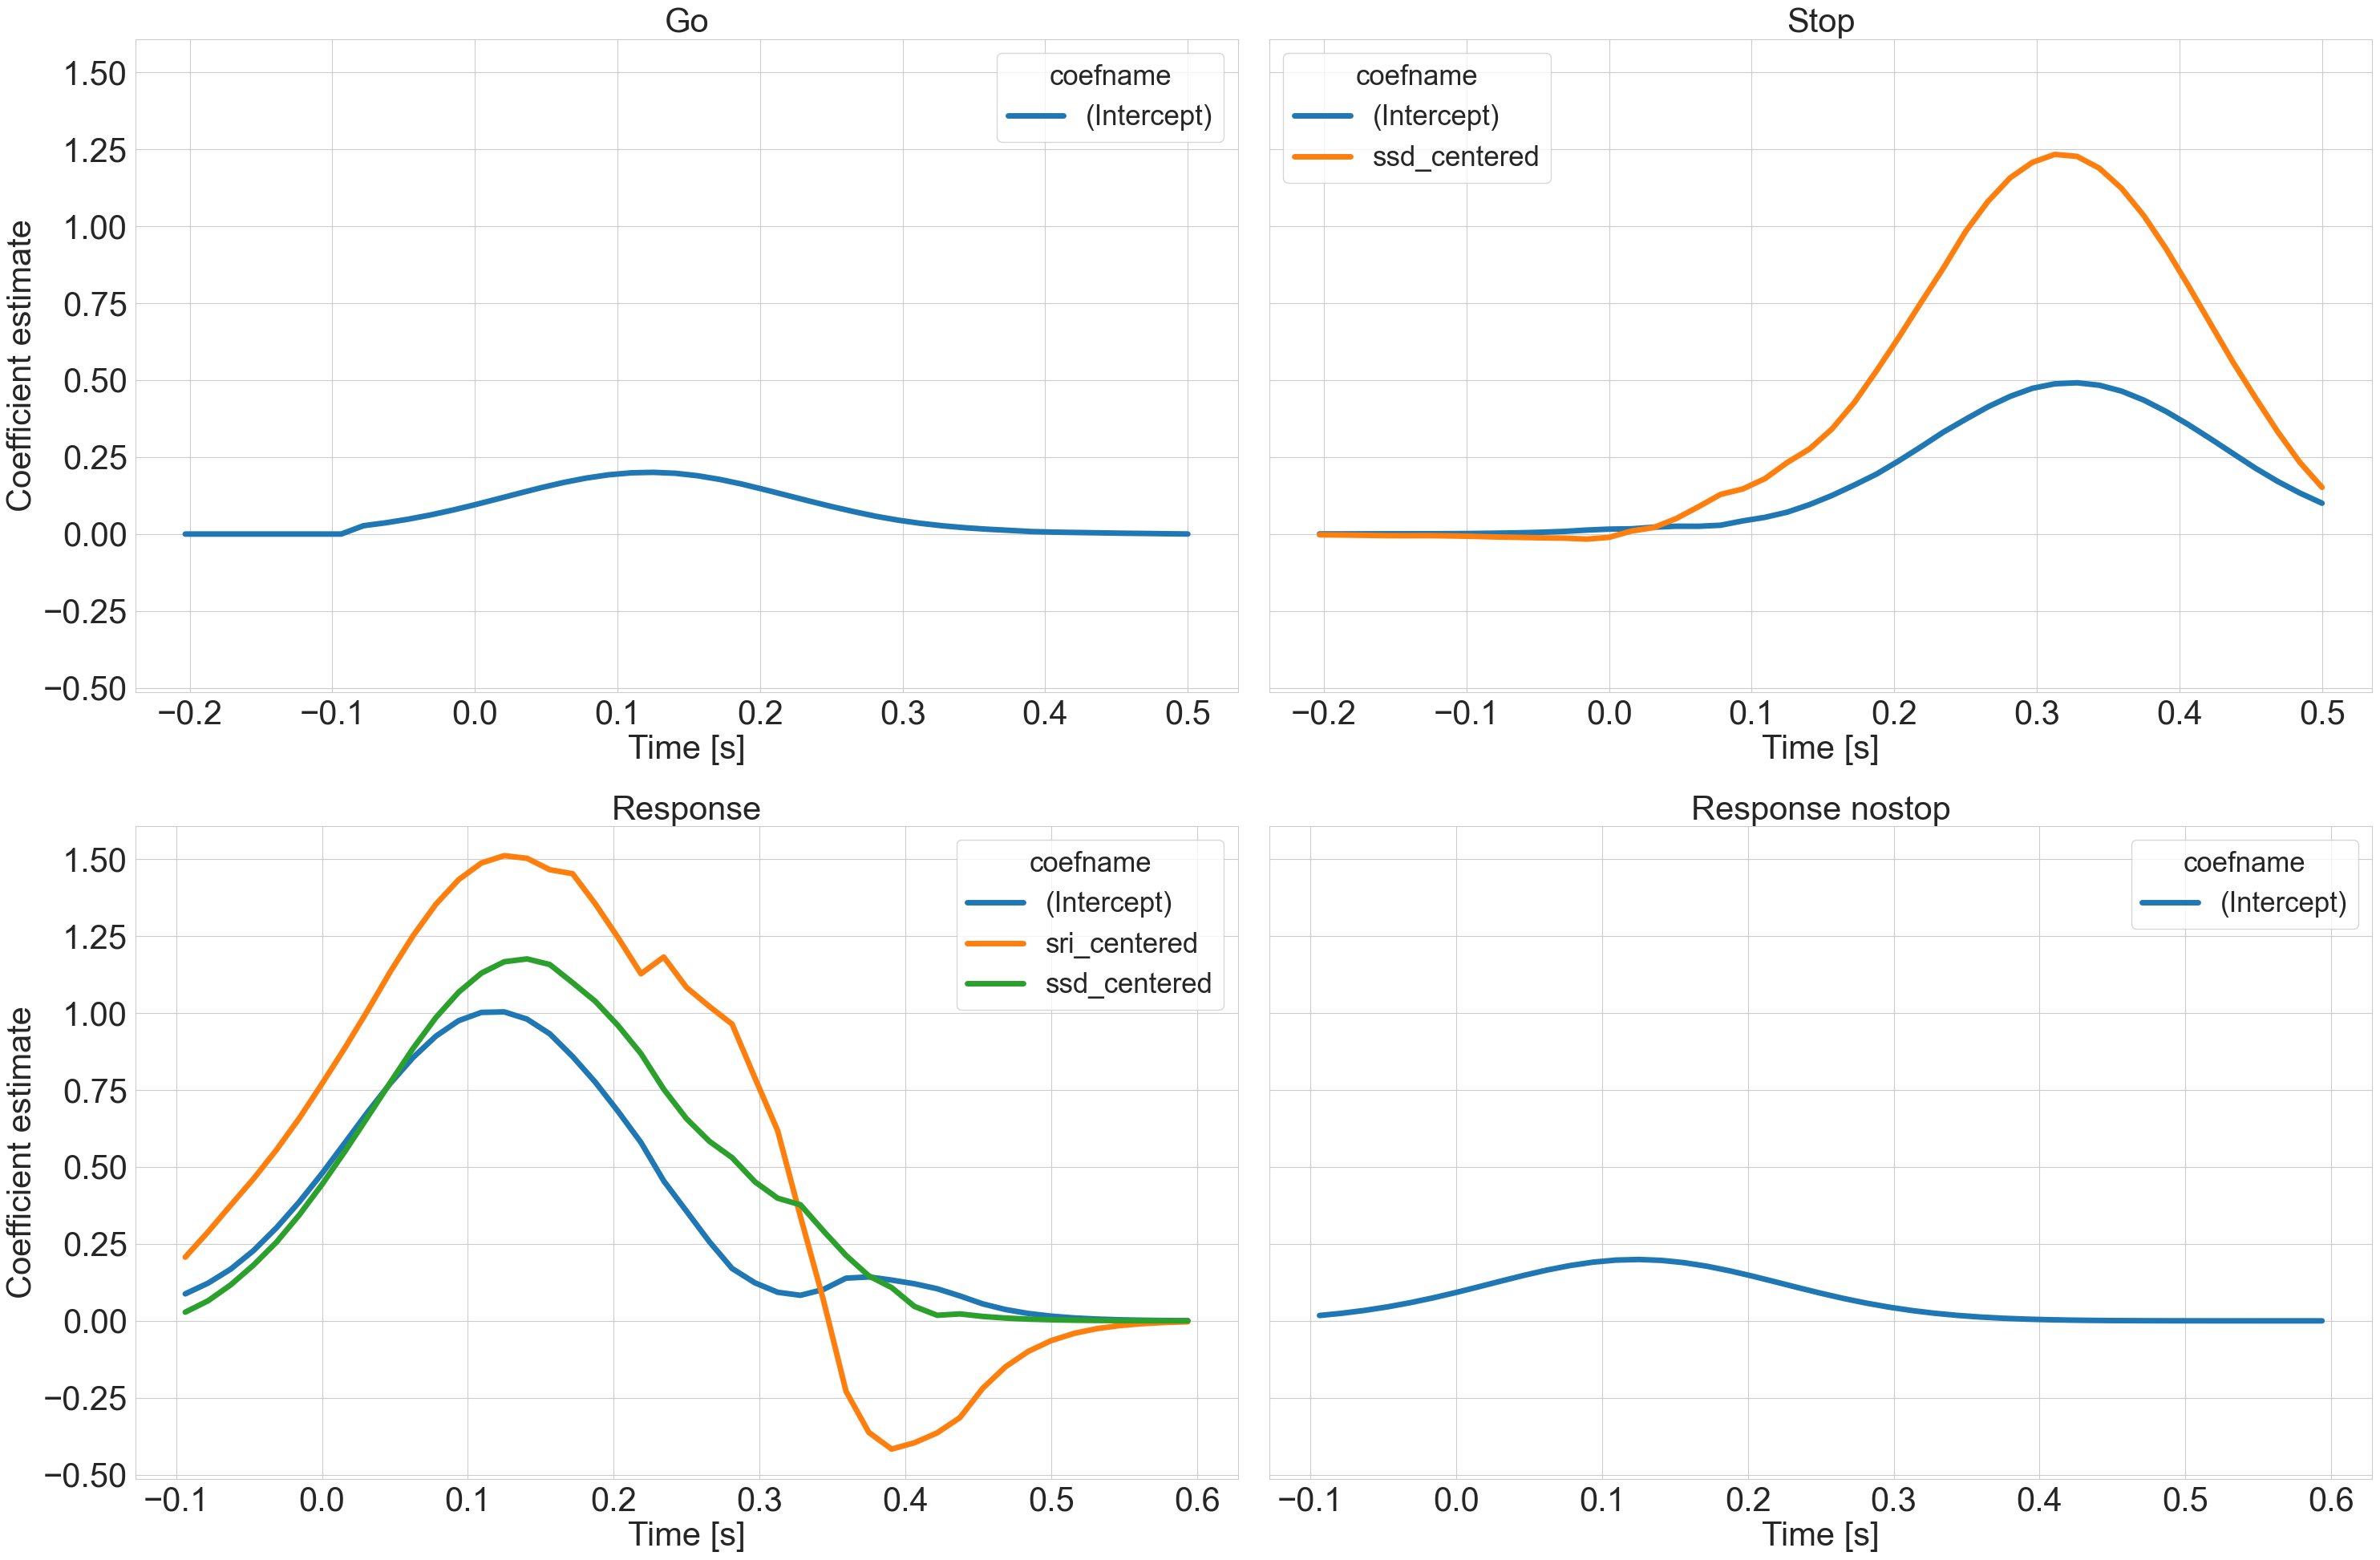

SRI mean: 0.3


<Figure size 640x480 with 0 Axes>

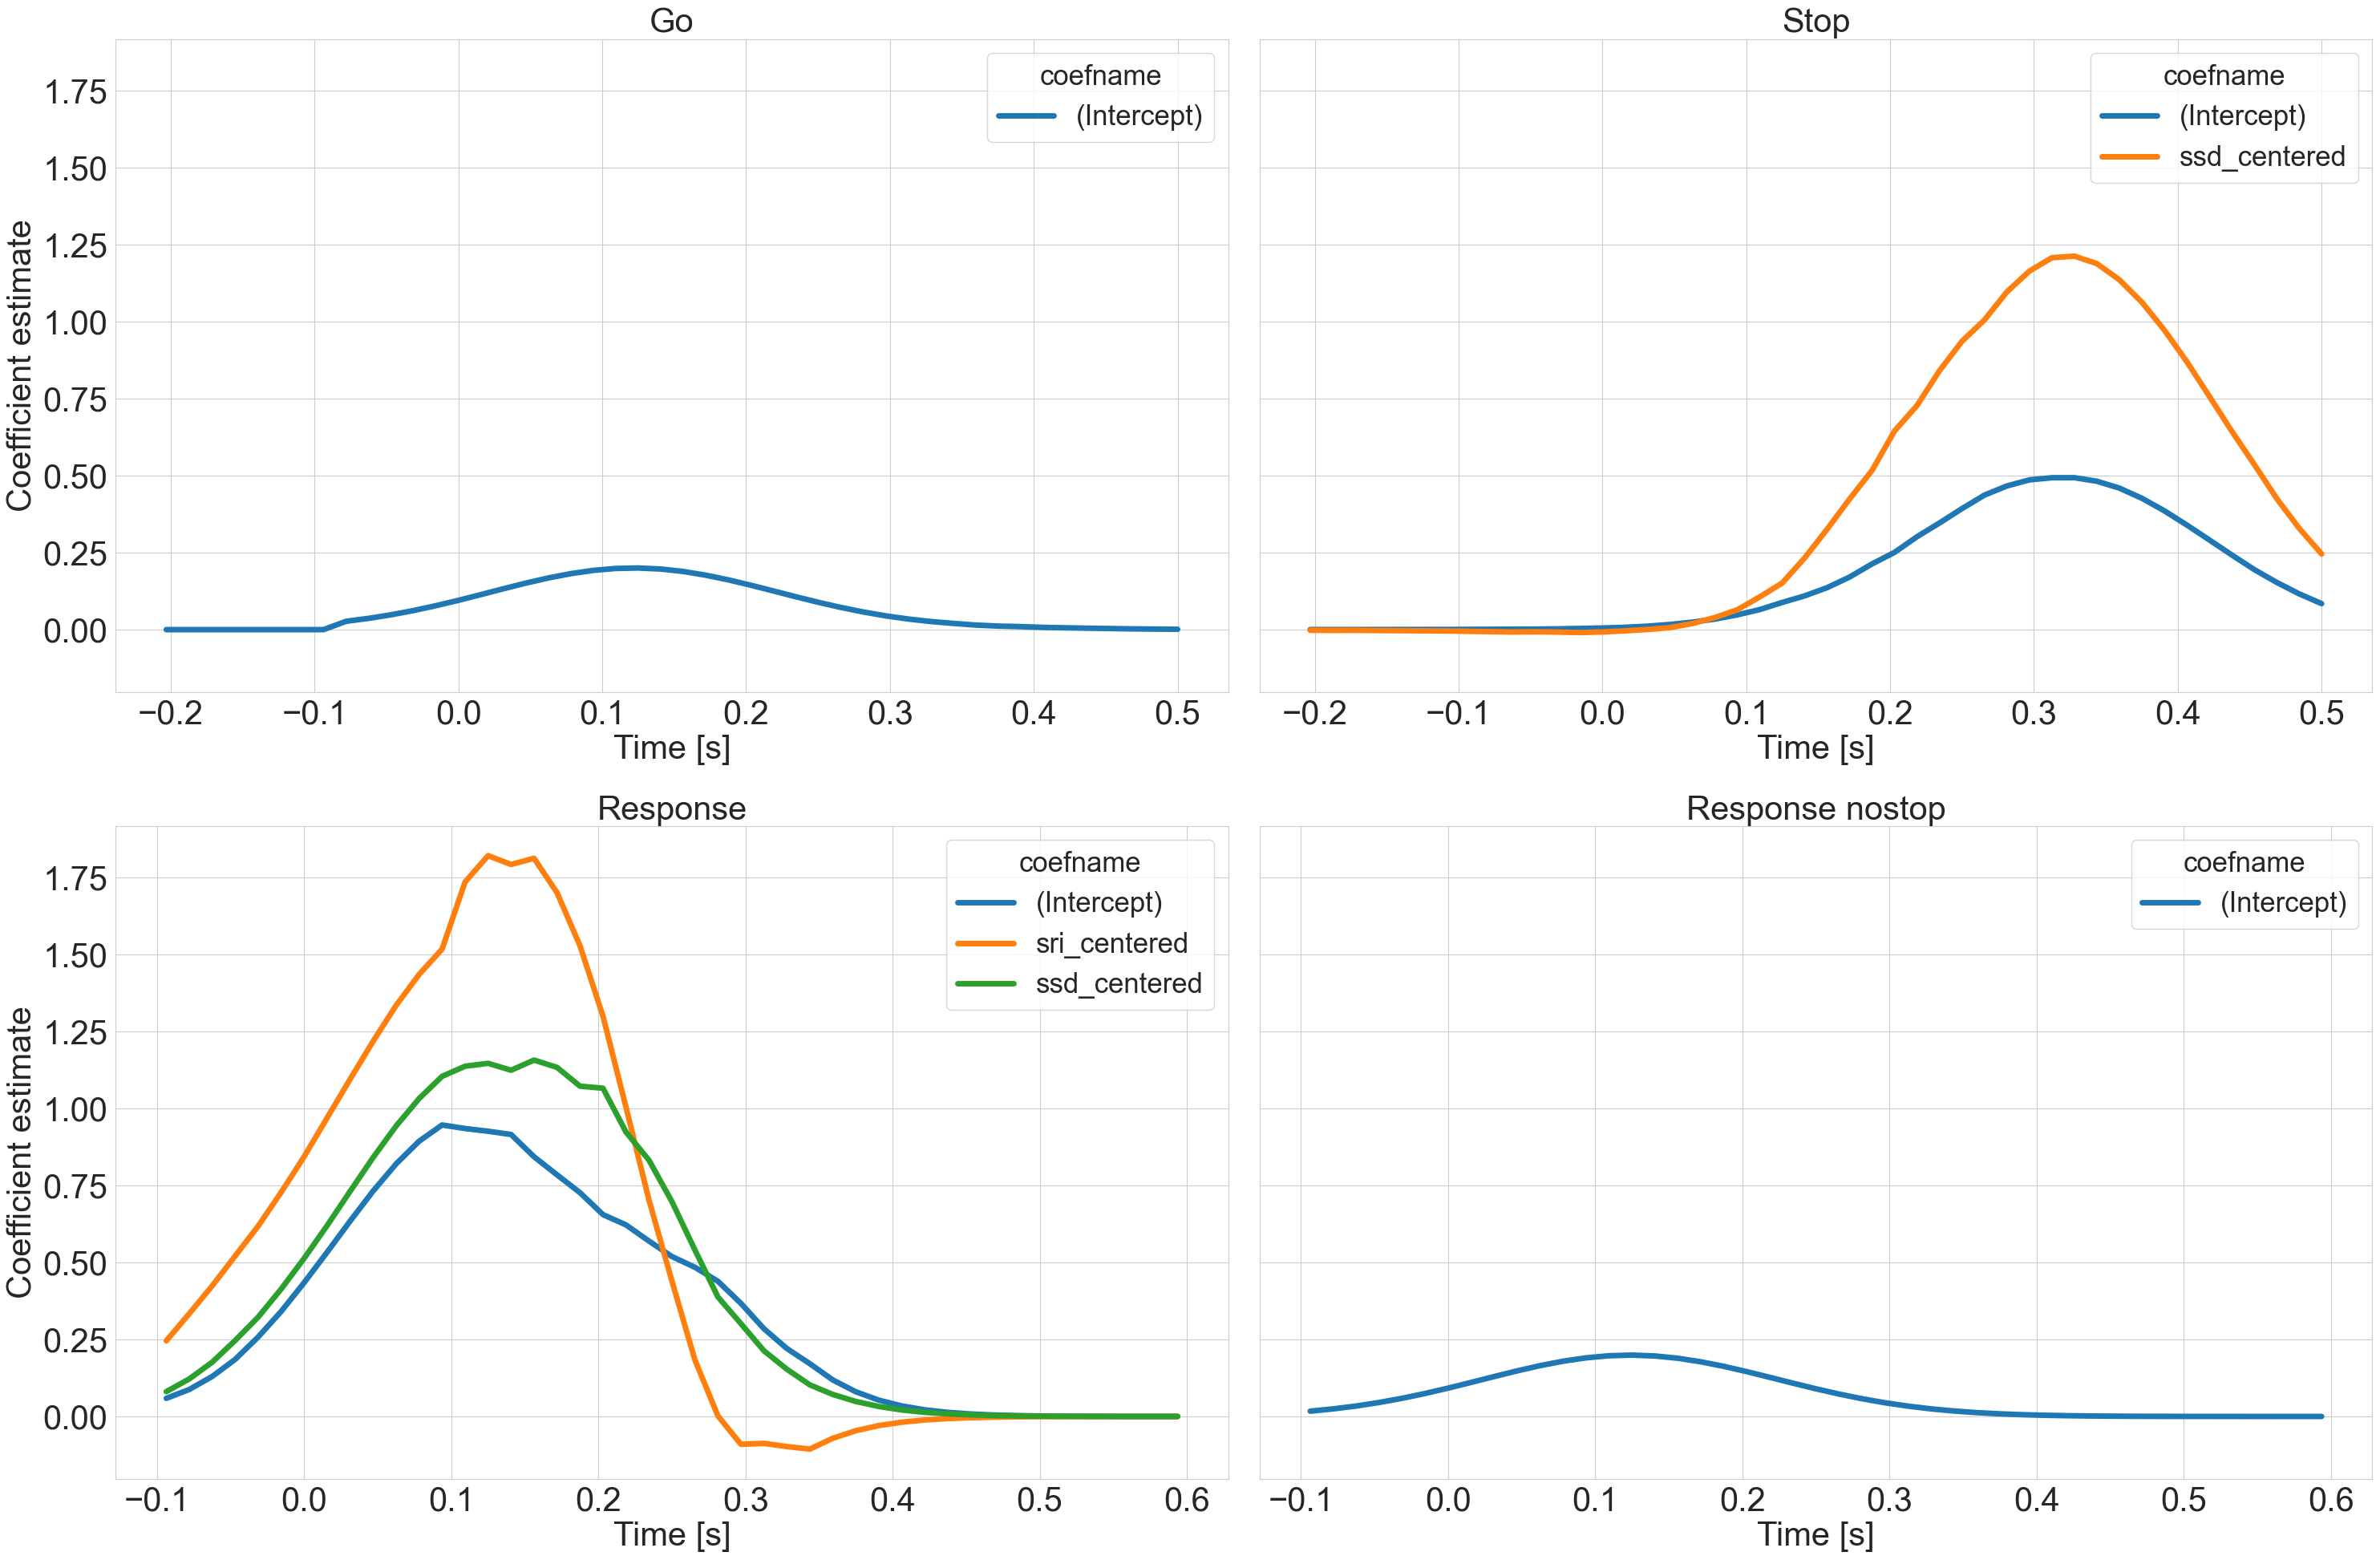

SRI mean: 0.4


<Figure size 640x480 with 0 Axes>

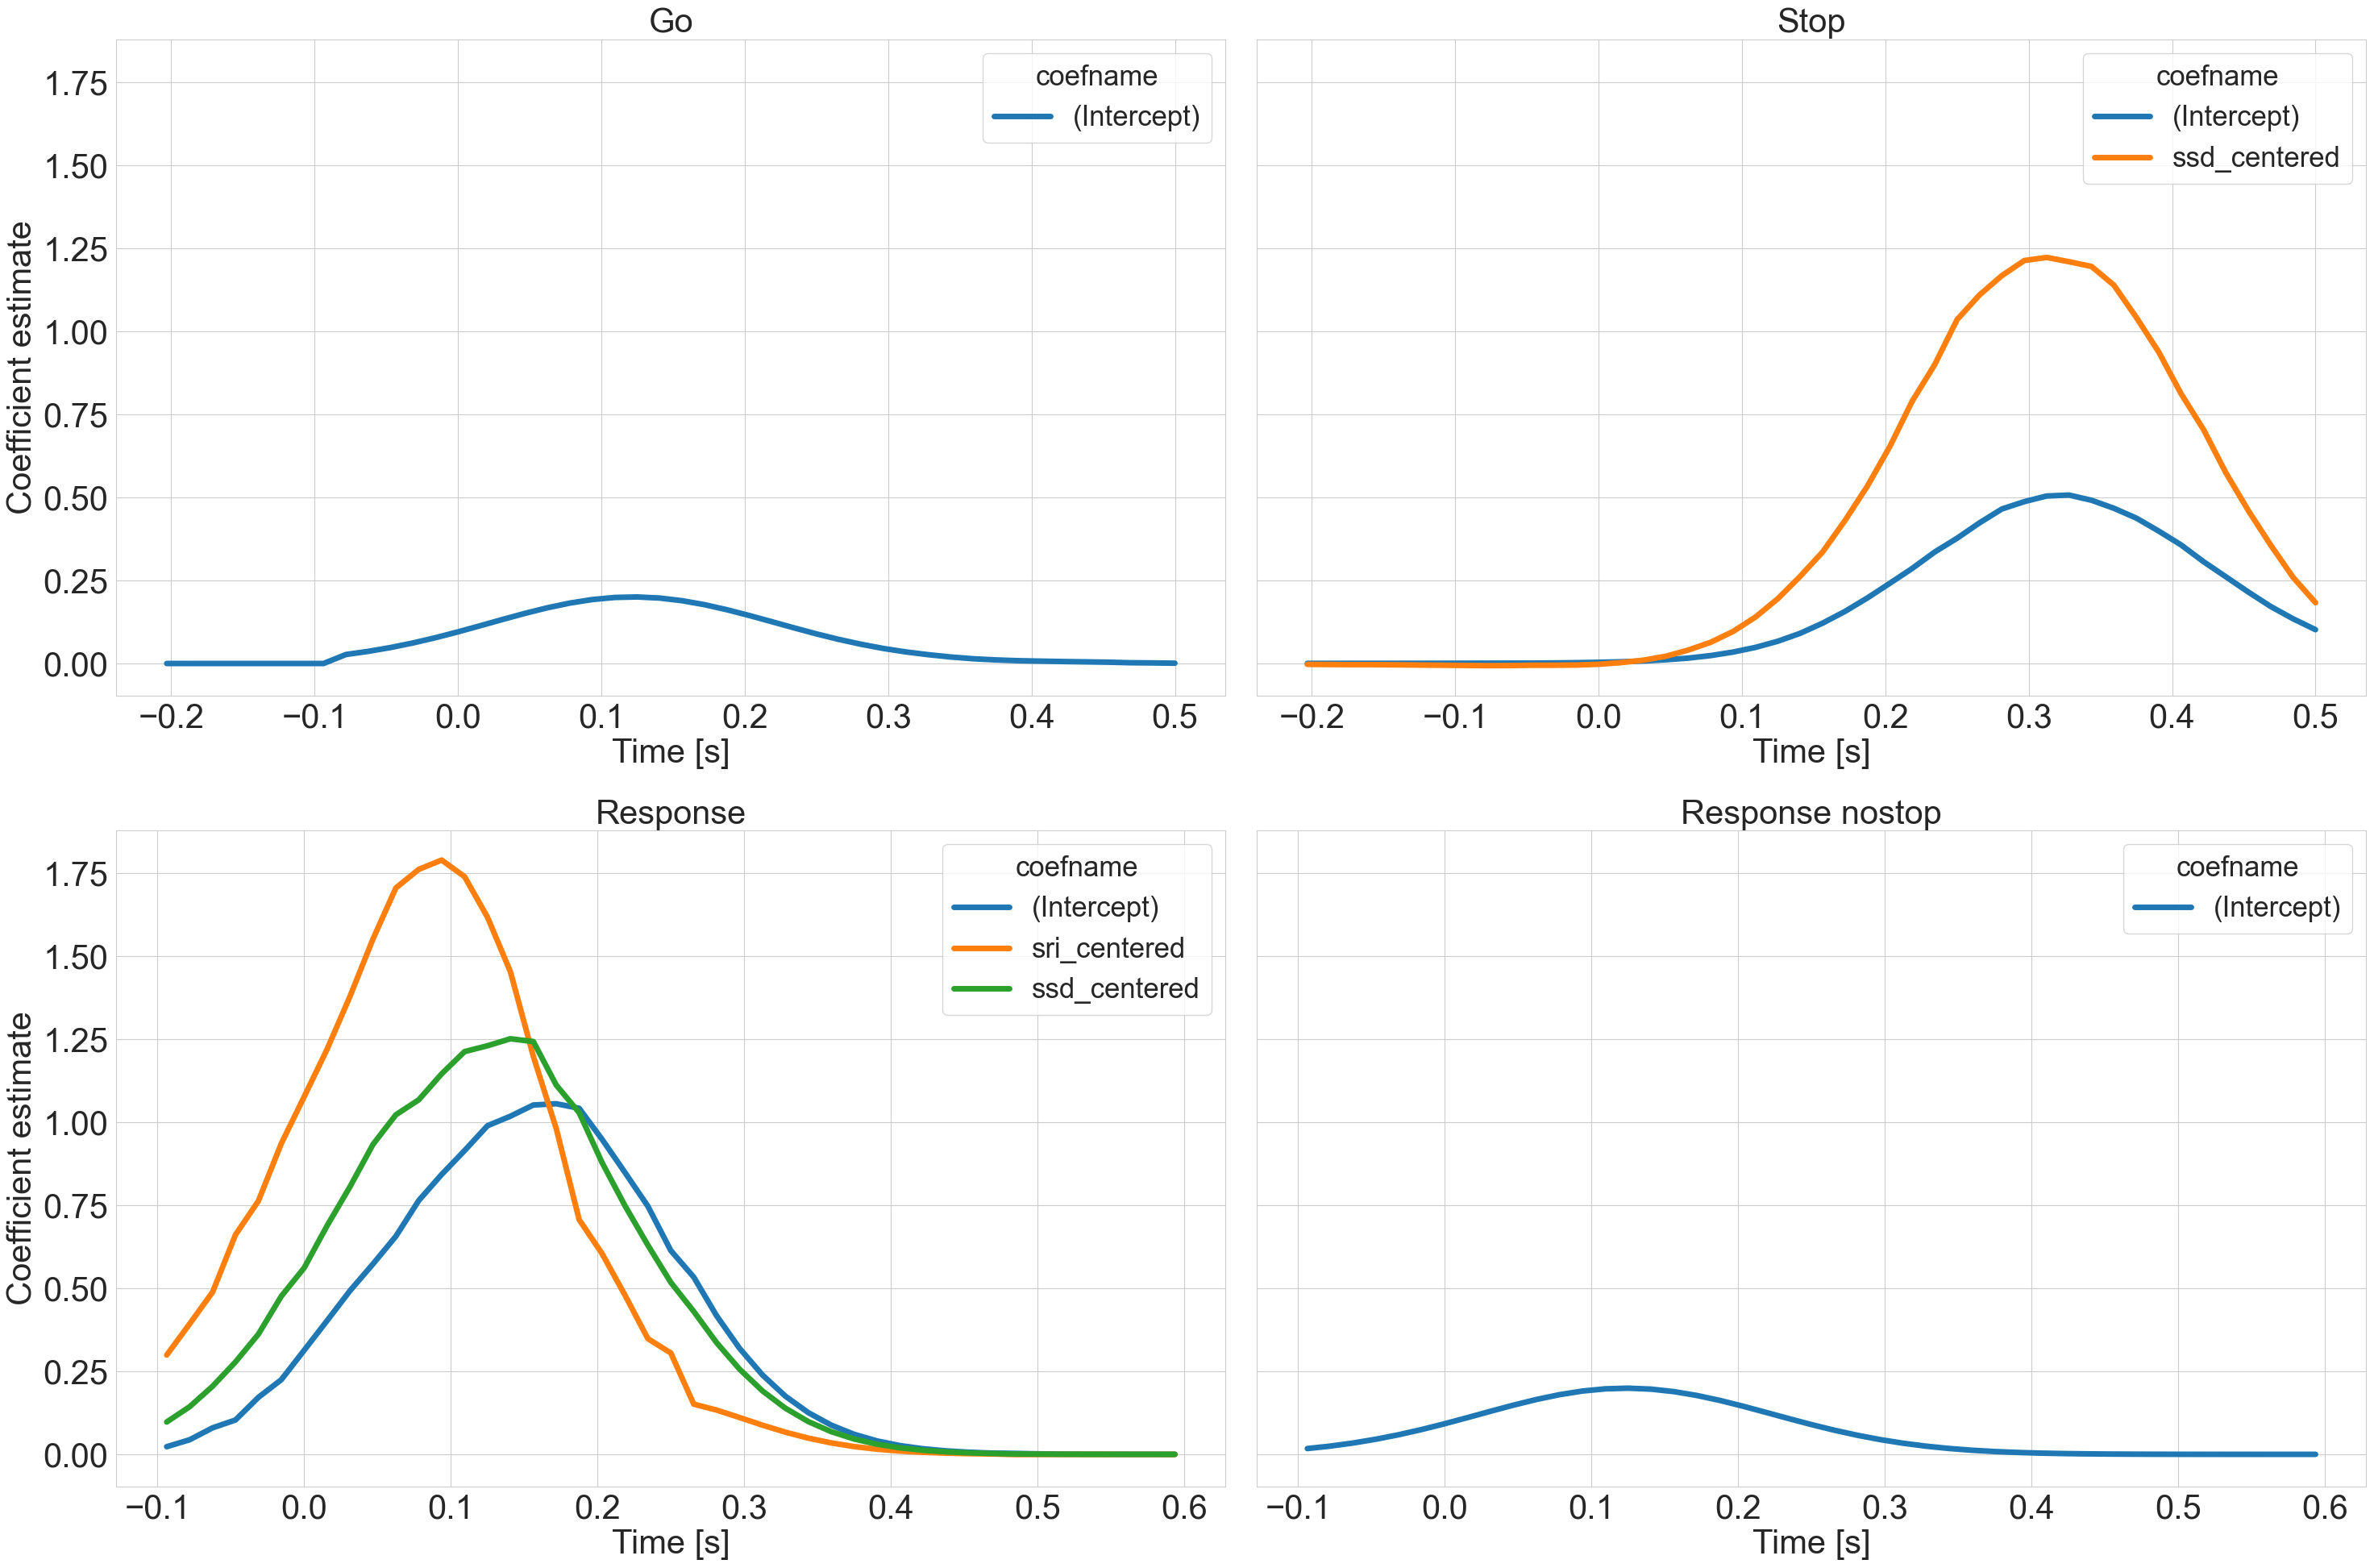

SRI mean: 0.5


<Figure size 640x480 with 0 Axes>

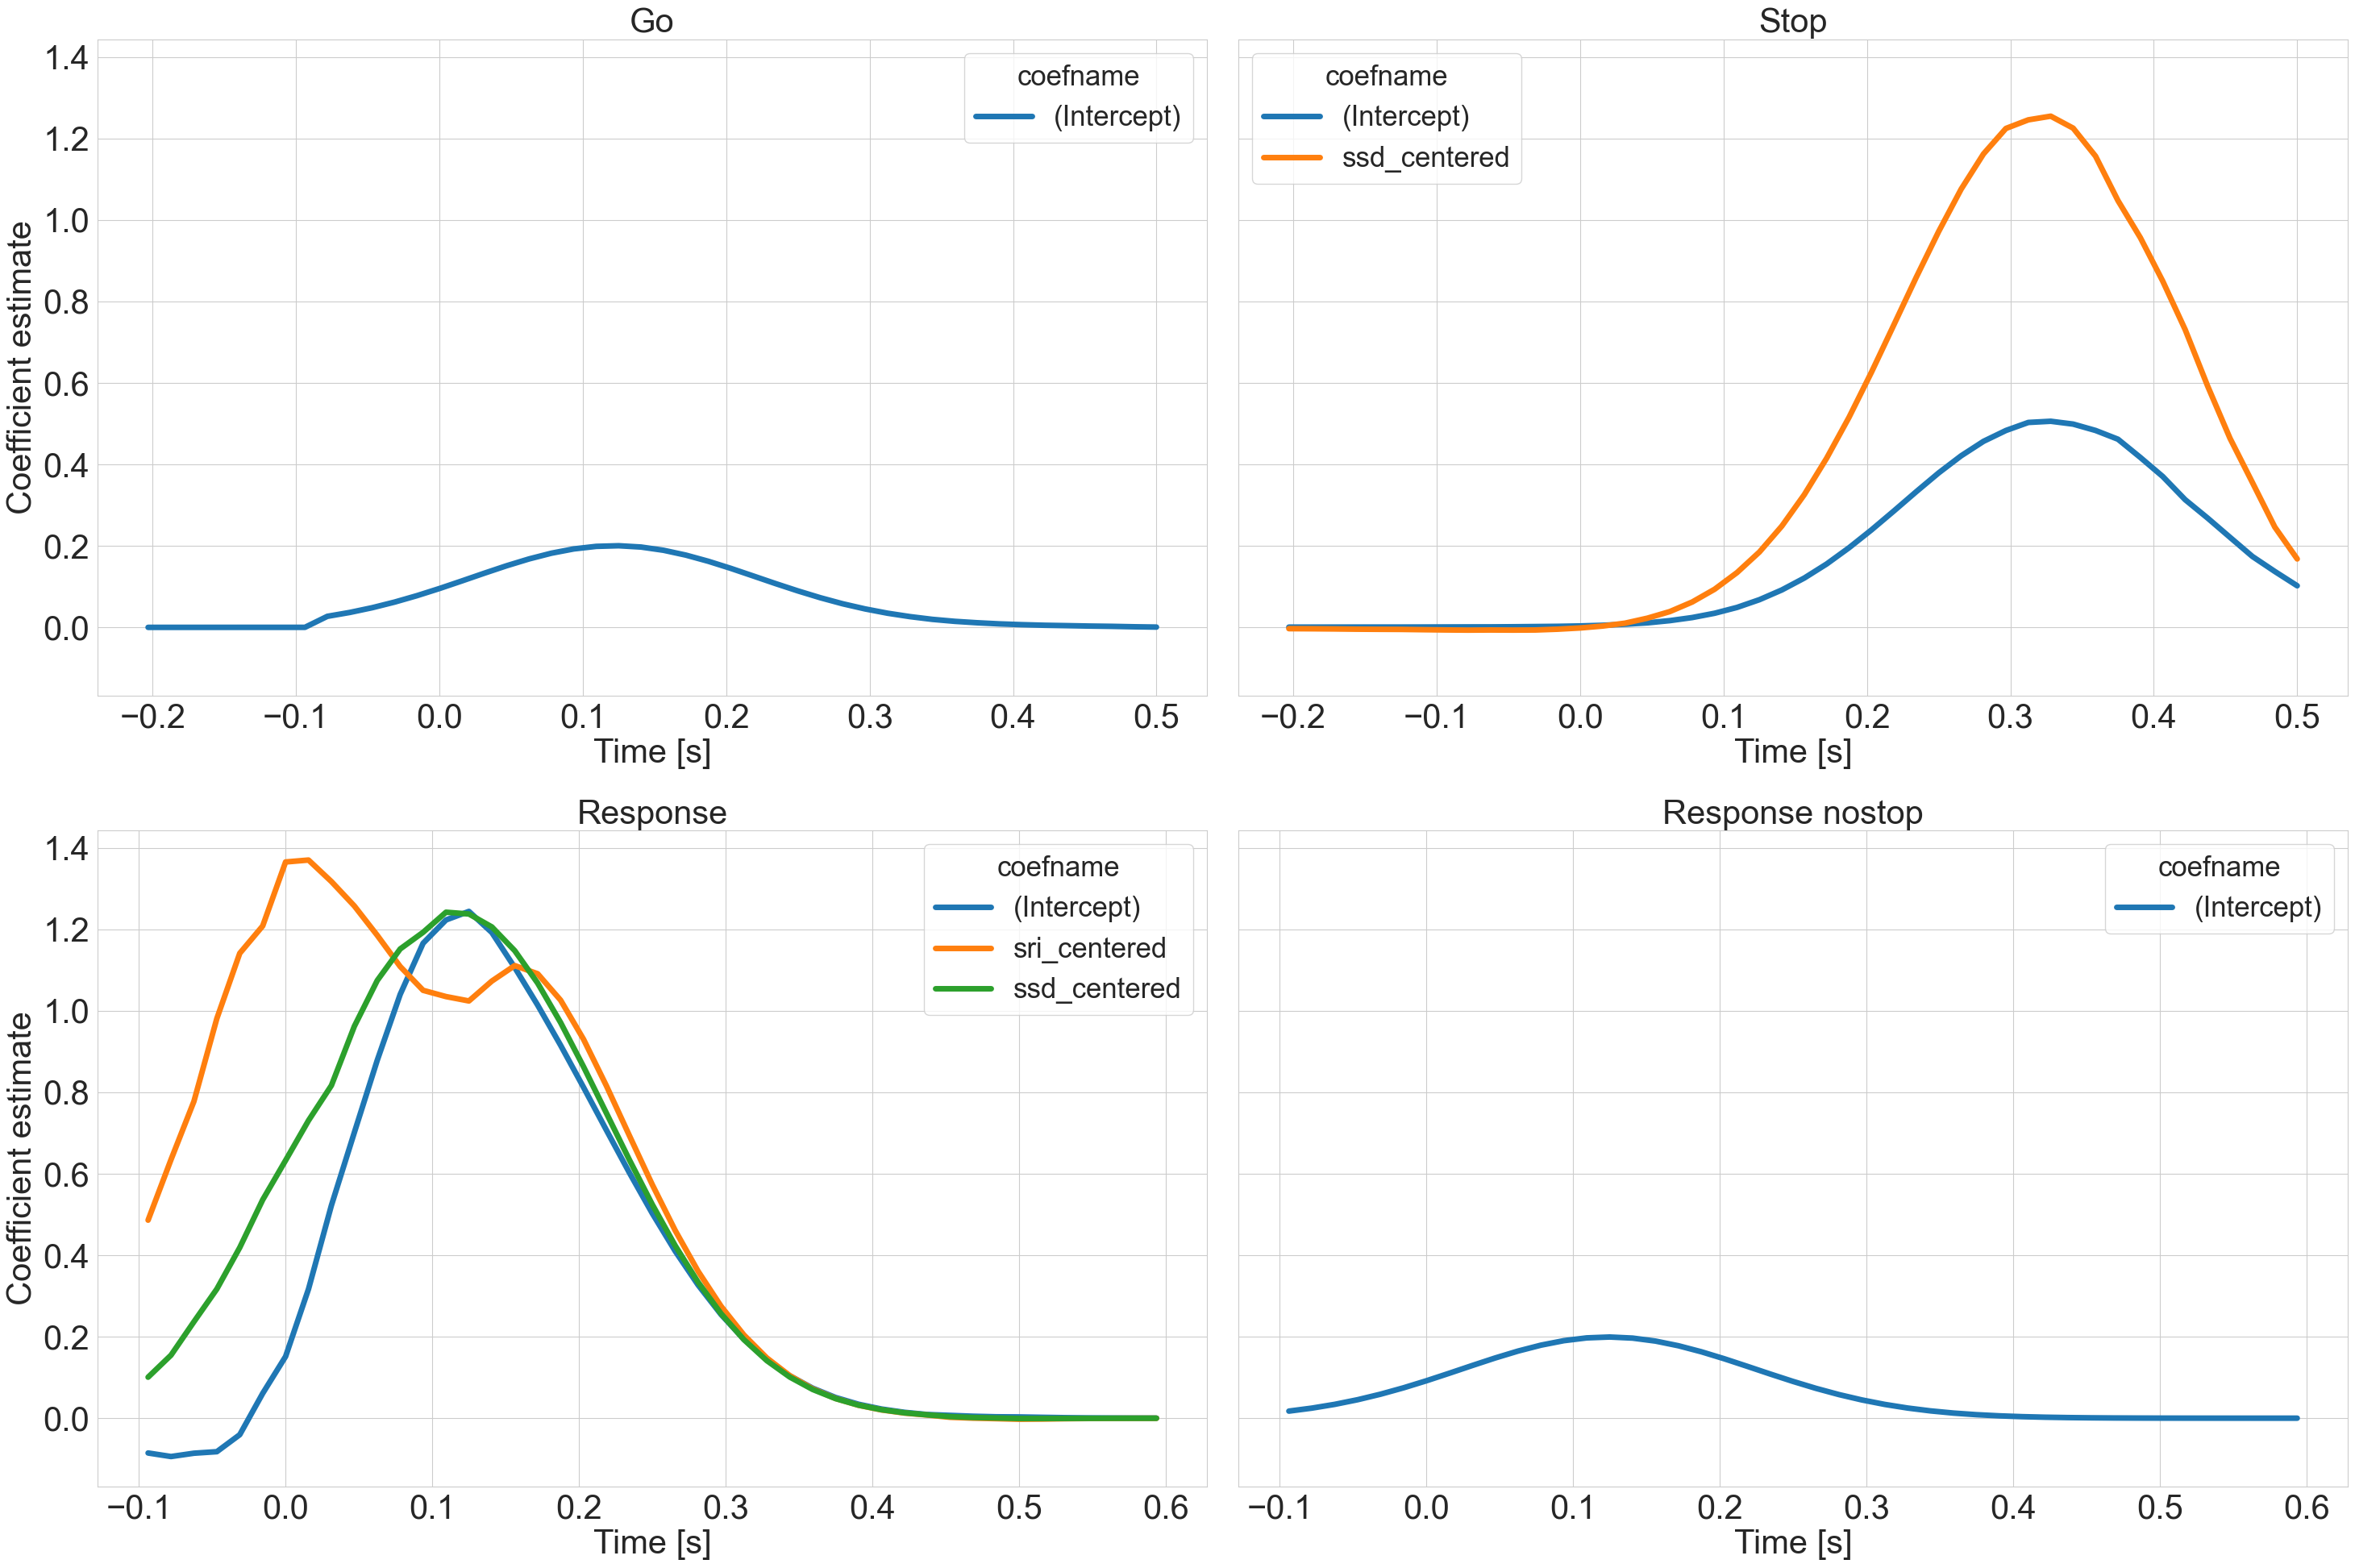

In [5]:
# Parameters
n_trials_per_ssd = 100
distances_C_A = np.arange(0.1, 0.4, 0.05)
sampling_rate = 64
noise_level = 0
duration=1.5


sri_means = [0.2, 0.3, 0.4, 0.5]

for i, sri_mean in enumerate(sri_means):
    config = {
        'go_intercept': 0.2,
        'stop_intercept': 0.5,
        'response_intercept':
            {
                'error': 1,
                'correct_nostop':0.2
            },
        'interactions': {
            'stop x SSD': True,
            'response_error x SSD': True,
            'response_error x SRI': True,
        },
        'probability': {
            'stop': 0.3,
            'error': 0.5,

        },
        'sri': {'loc': sri_mean, 'scale': 0.05}
    }

    # Simulate ERP components with conditions
    erp_trials, data_df = simulations.simulate_erp_components_with_conditions_test(
        n_trials_per_ssd,
        distances_C_A,
        config,
        sampling_rate,
        noise_level,
        duration=duration,
        stop_diff=False,
        remove_ern=False,
        stop_component_offset = .2,
    )

    # create Unfold events dataset
    events_df = simulations.create_events_table(data_df, duration, sampling_rate)

    # perform unfolding
    results = unfold_utils.perform_unfold2(events_df, erp_trials)

    # plot results
    print(f'SRI mean: {sri_mean}')
    plt.figure(i)
    unfold_utils.plot_unfold_results_sst(results)


### No ERN

SRI mean: 0.2


<Figure size 640x480 with 0 Axes>

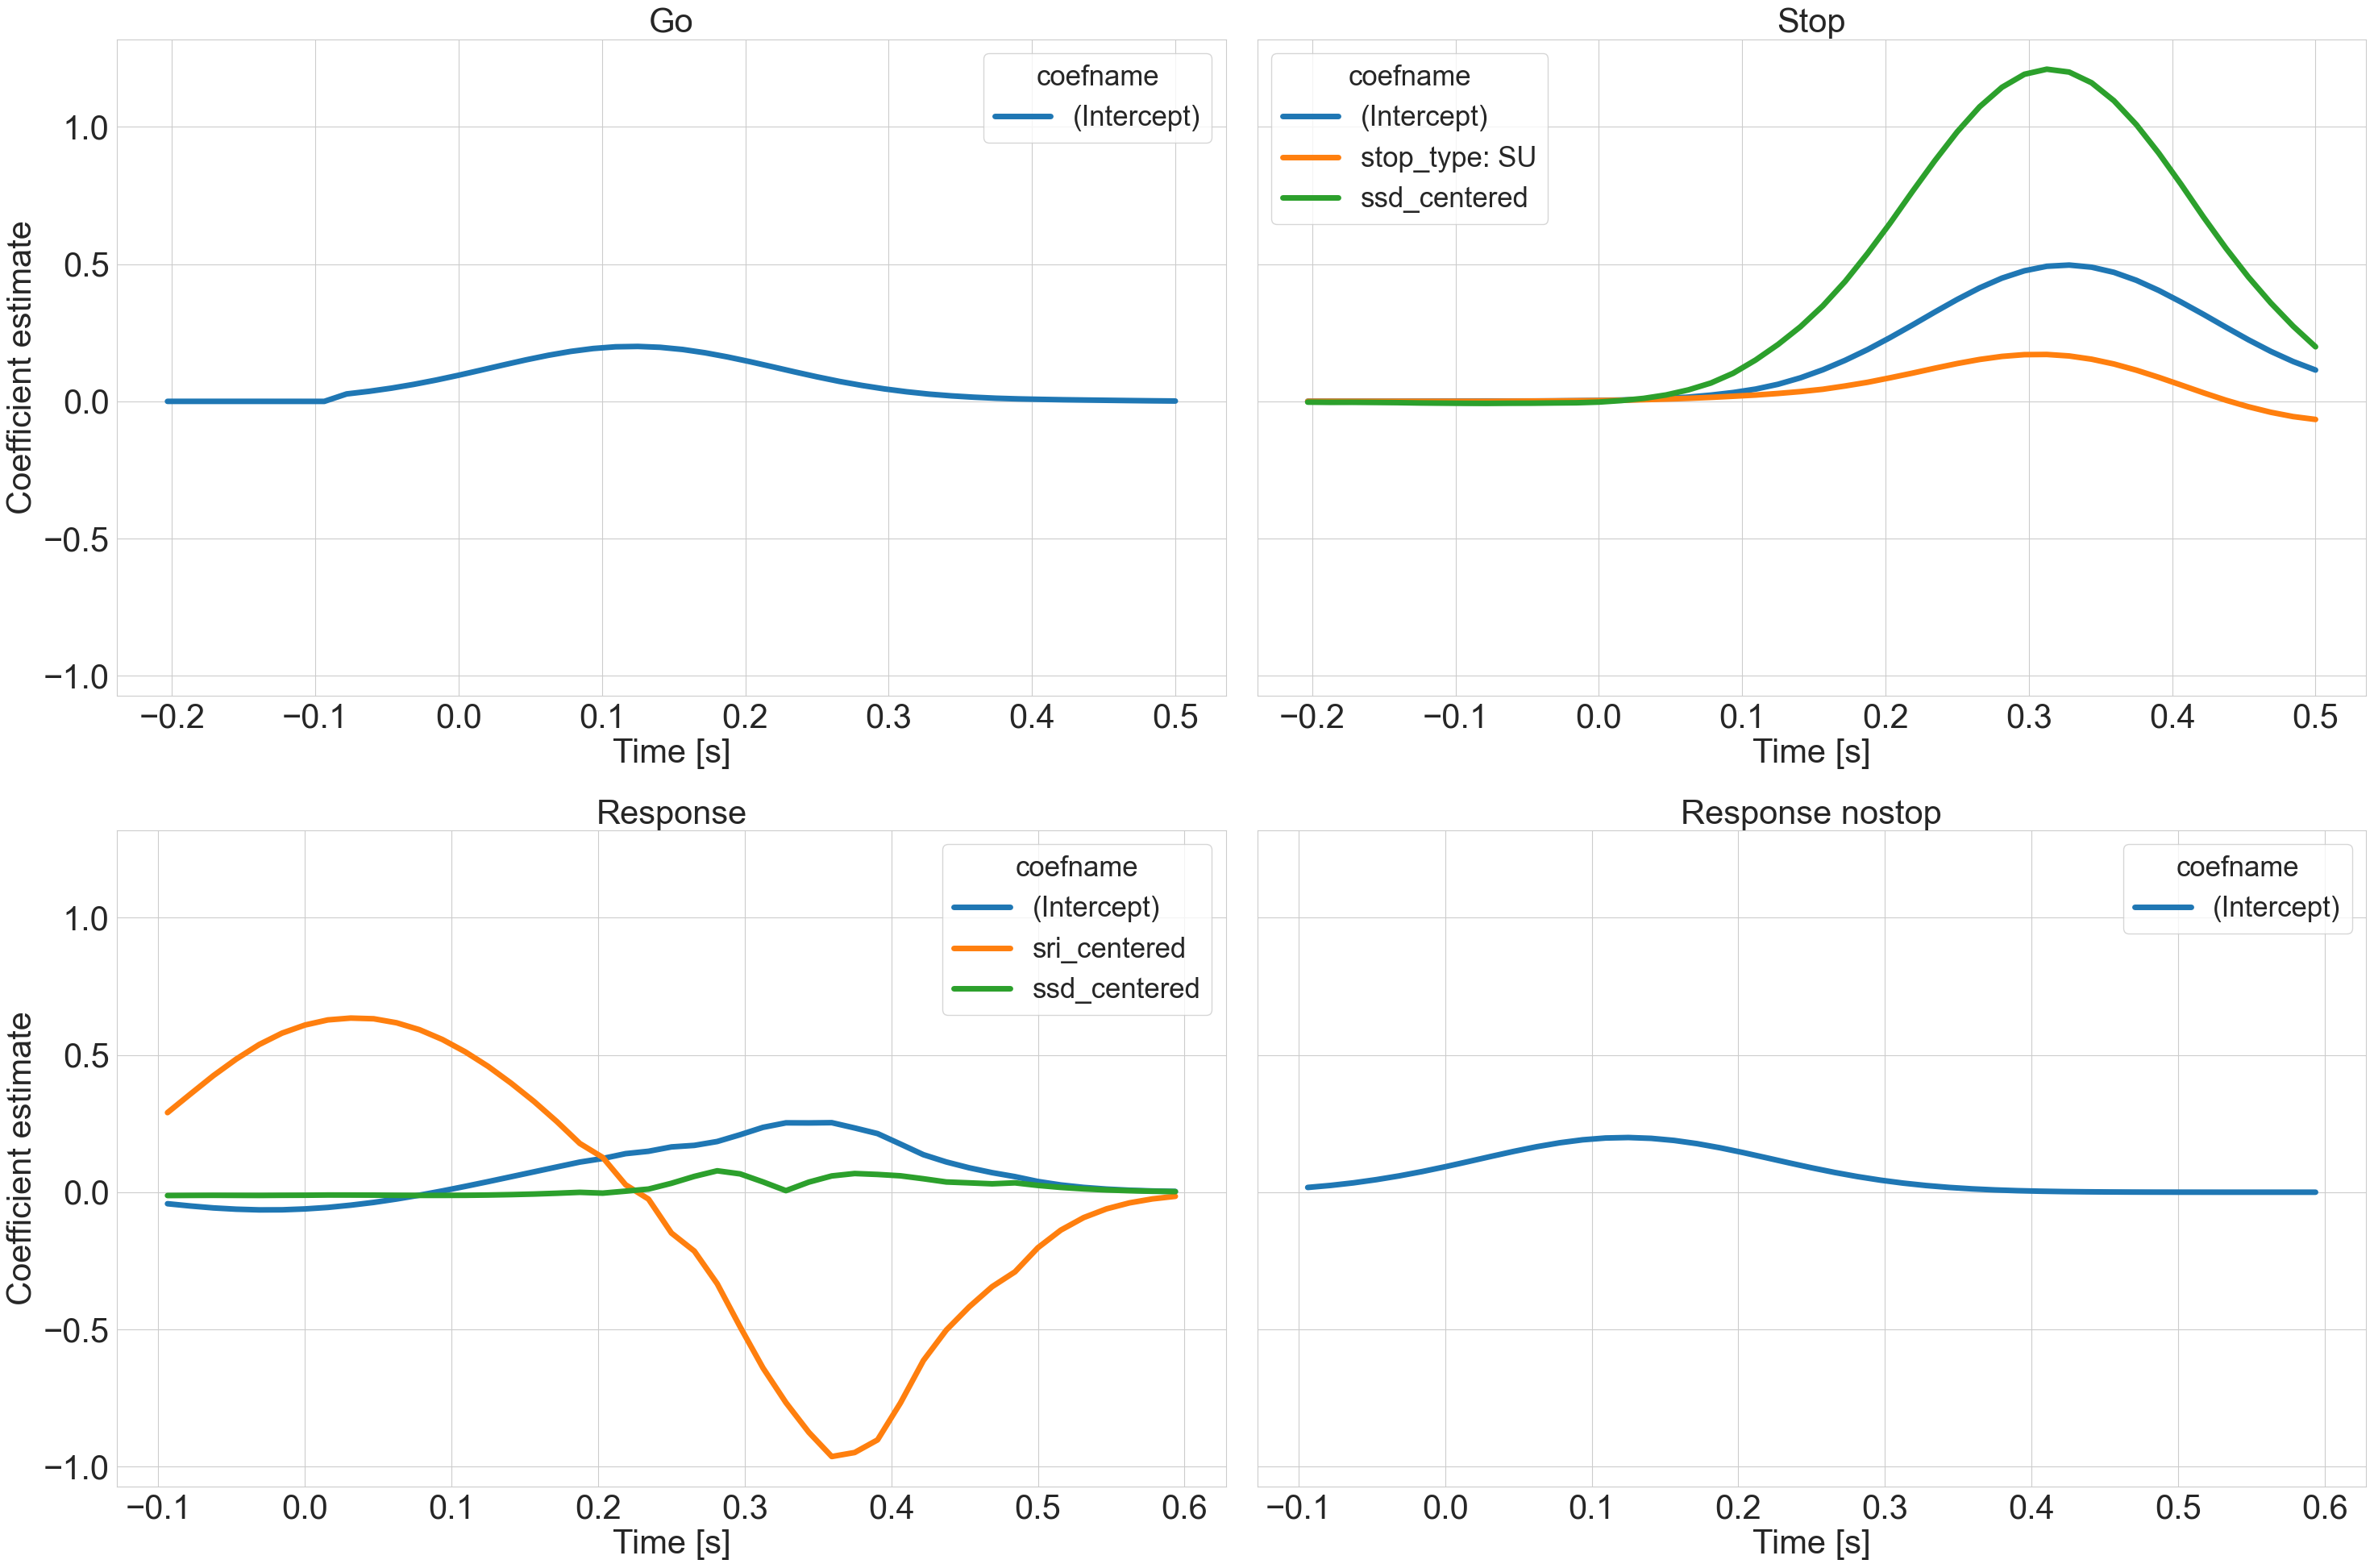

SRI mean: 0.3


<Figure size 640x480 with 0 Axes>

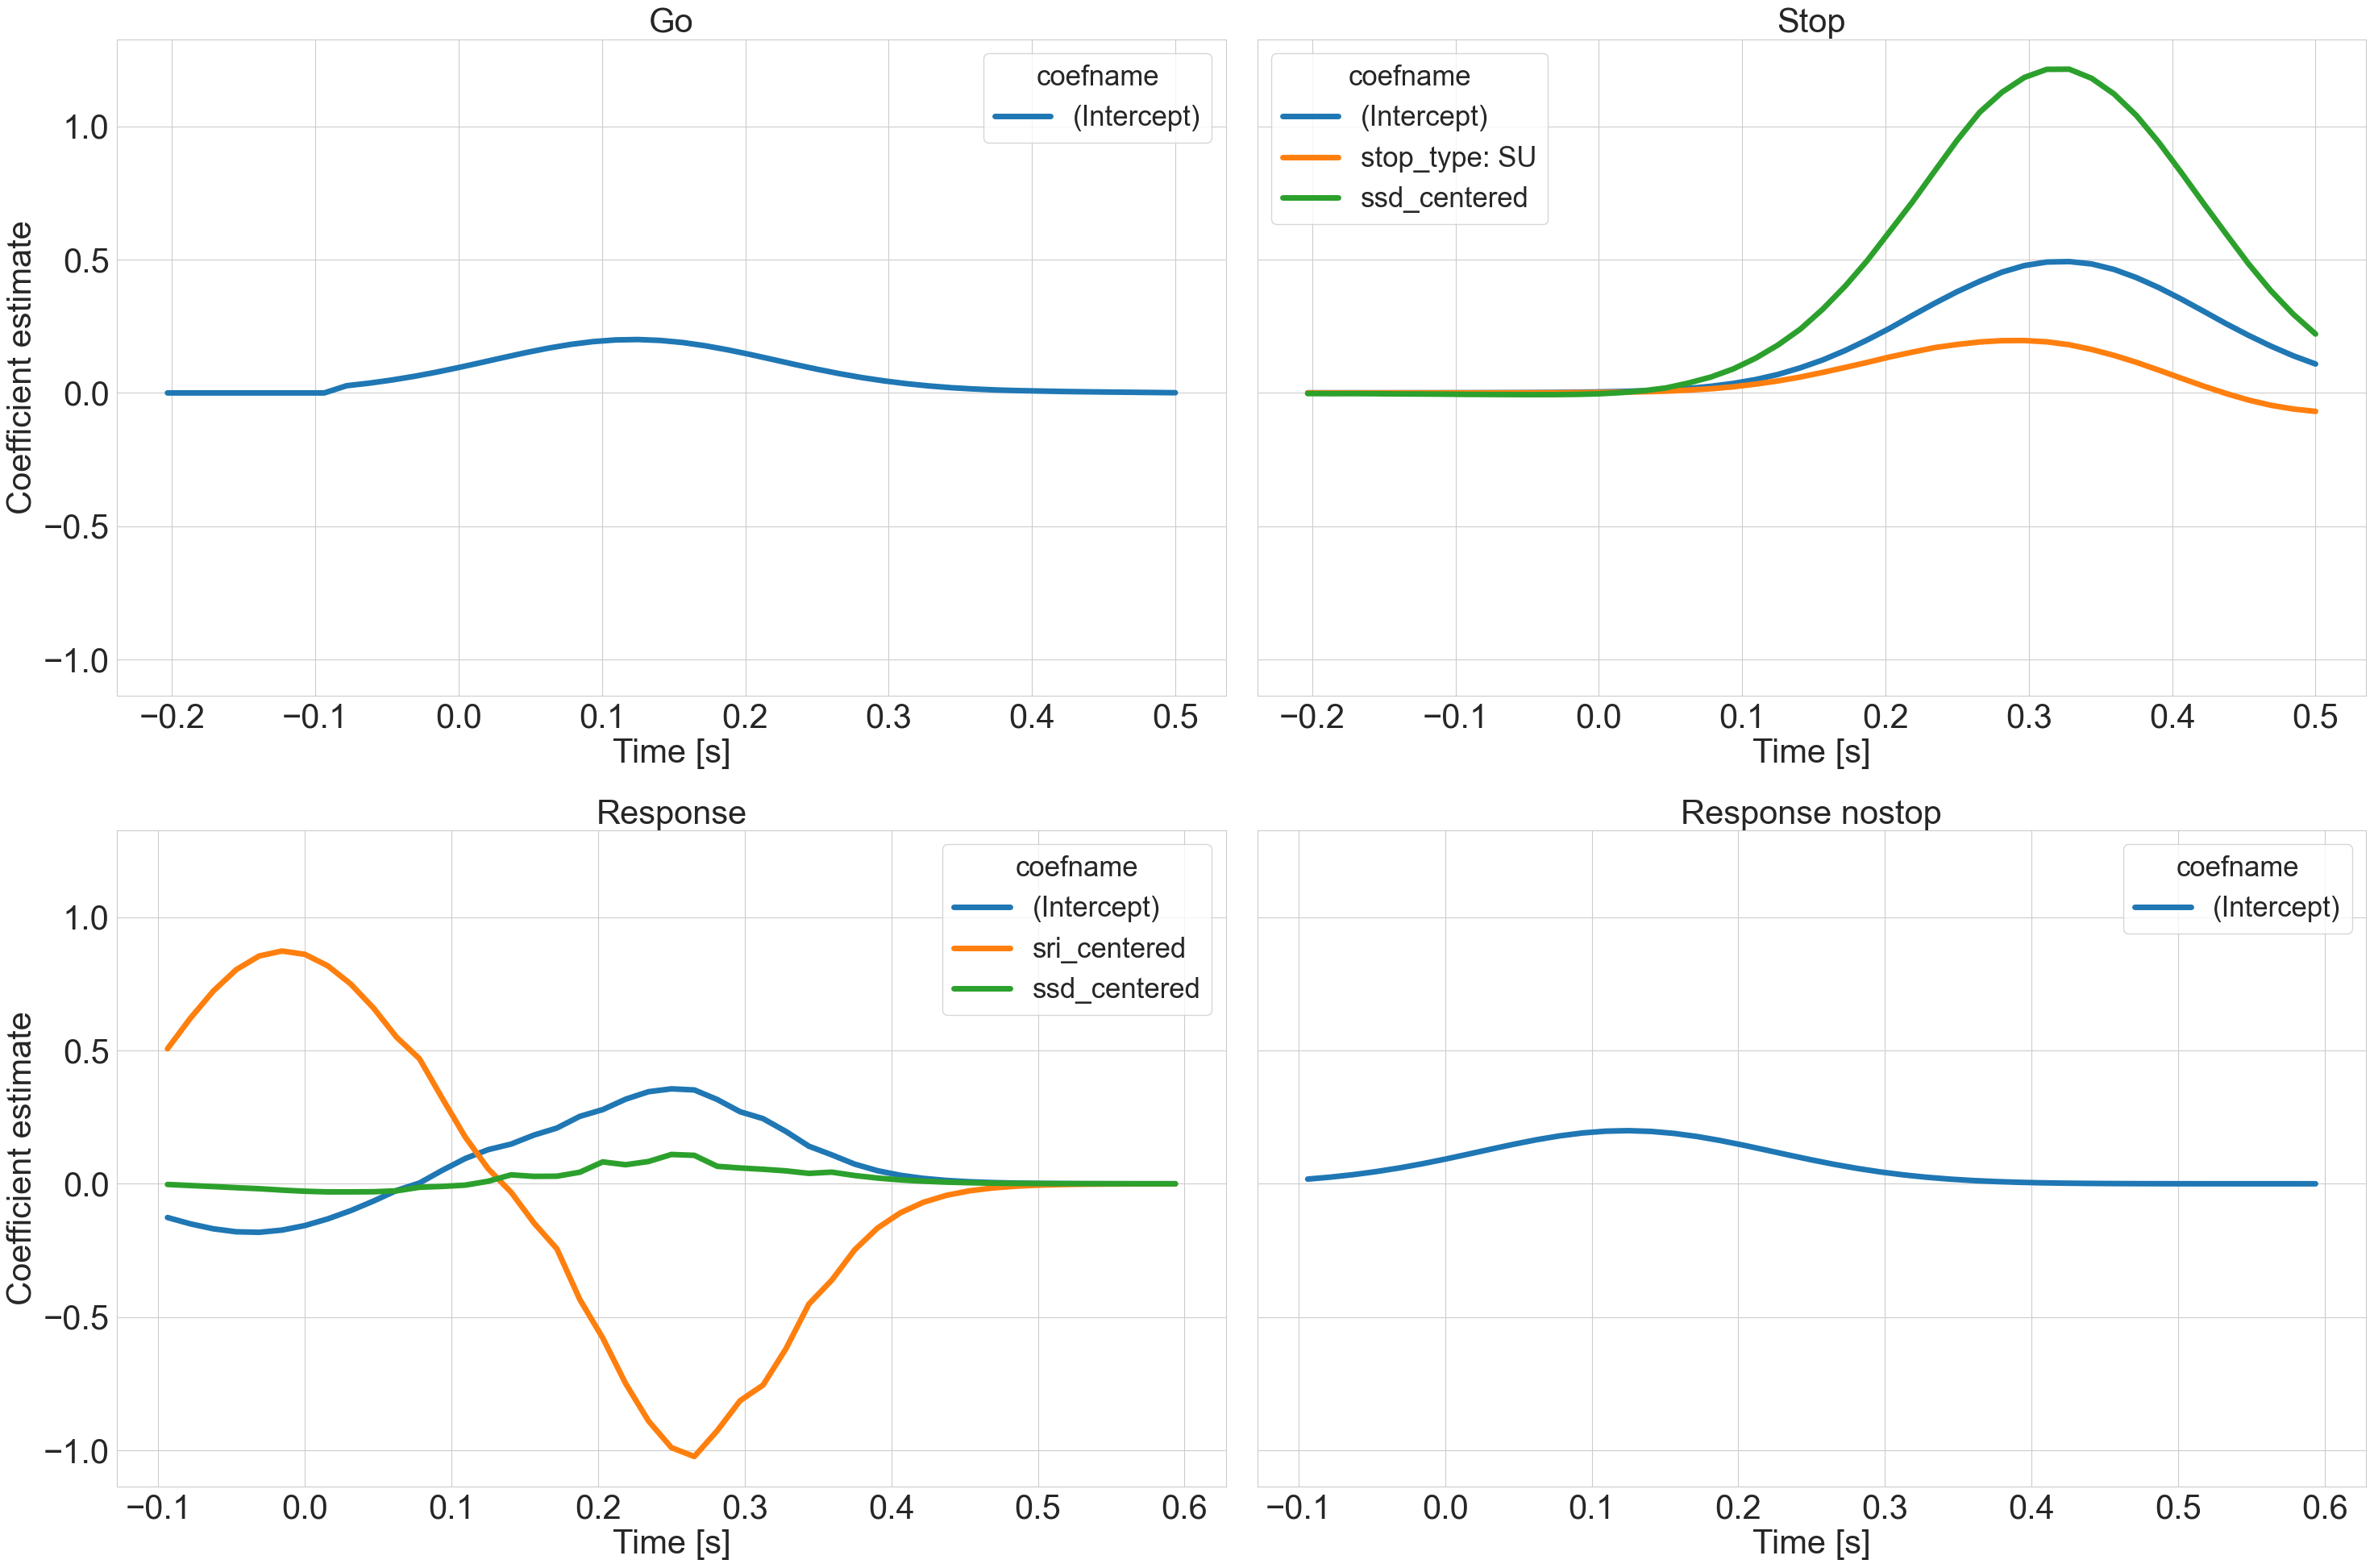

SRI mean: 0.4


<Figure size 640x480 with 0 Axes>

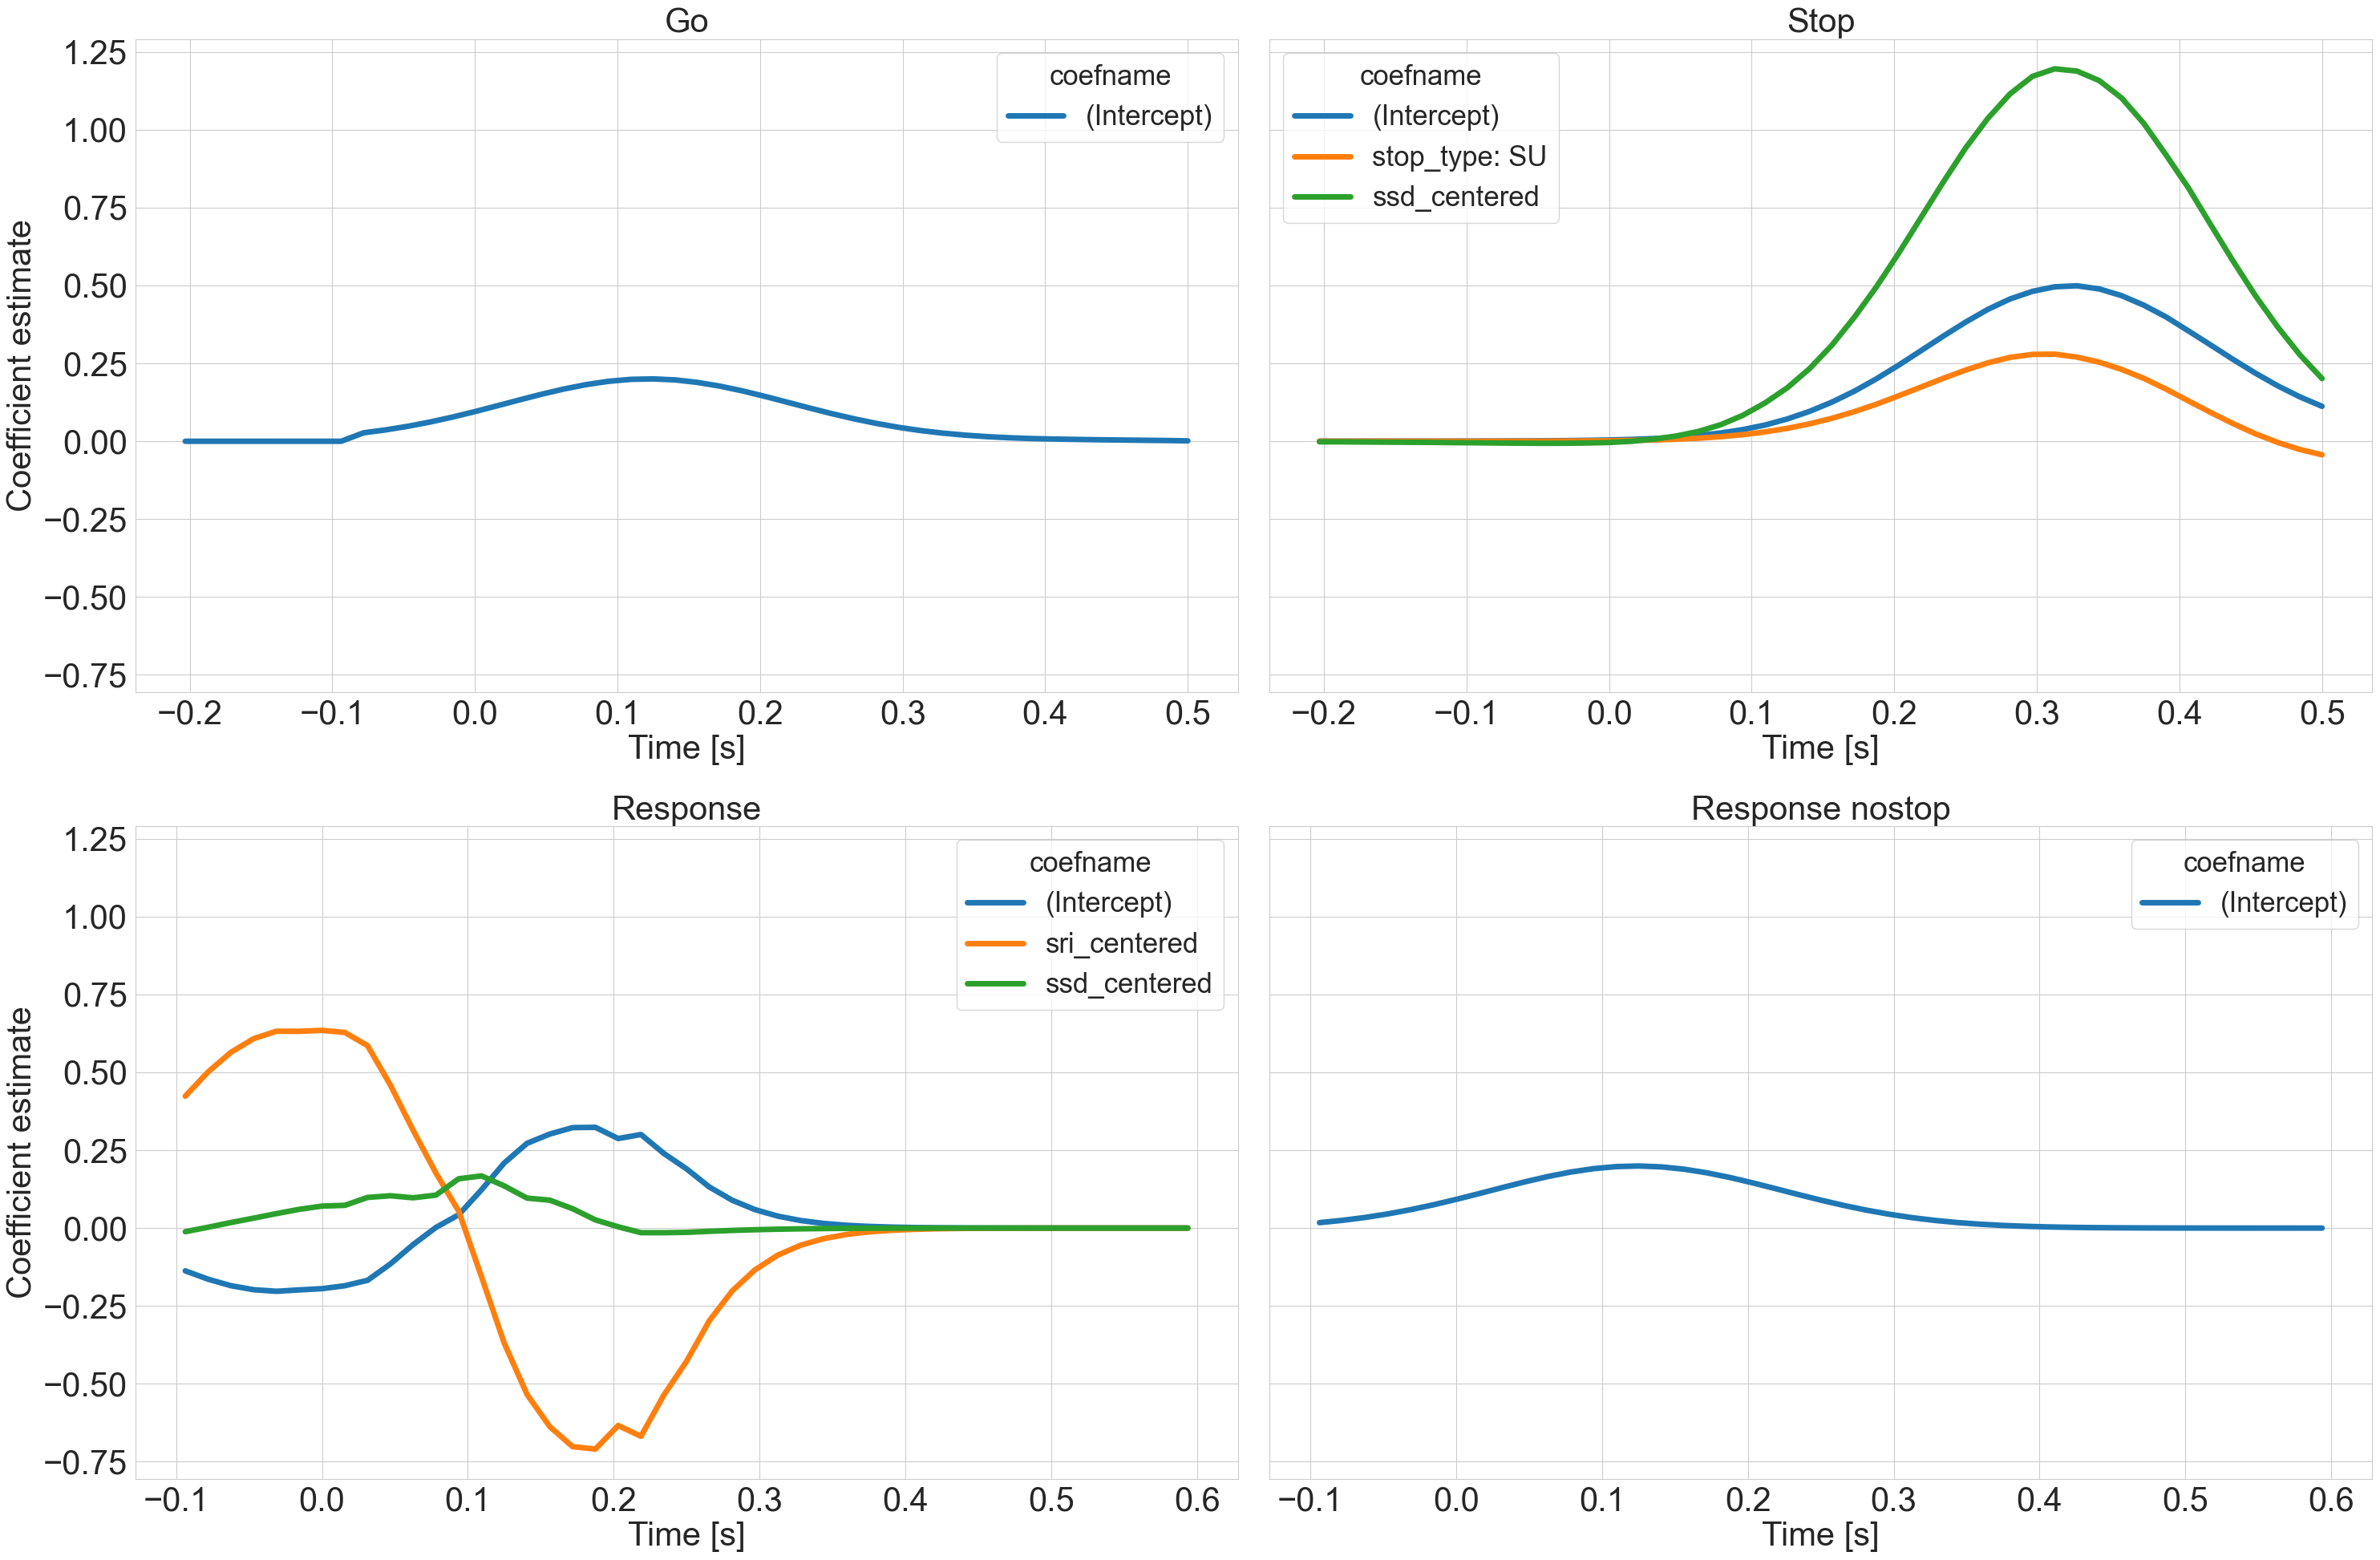

SRI mean: 0.5


<Figure size 640x480 with 0 Axes>

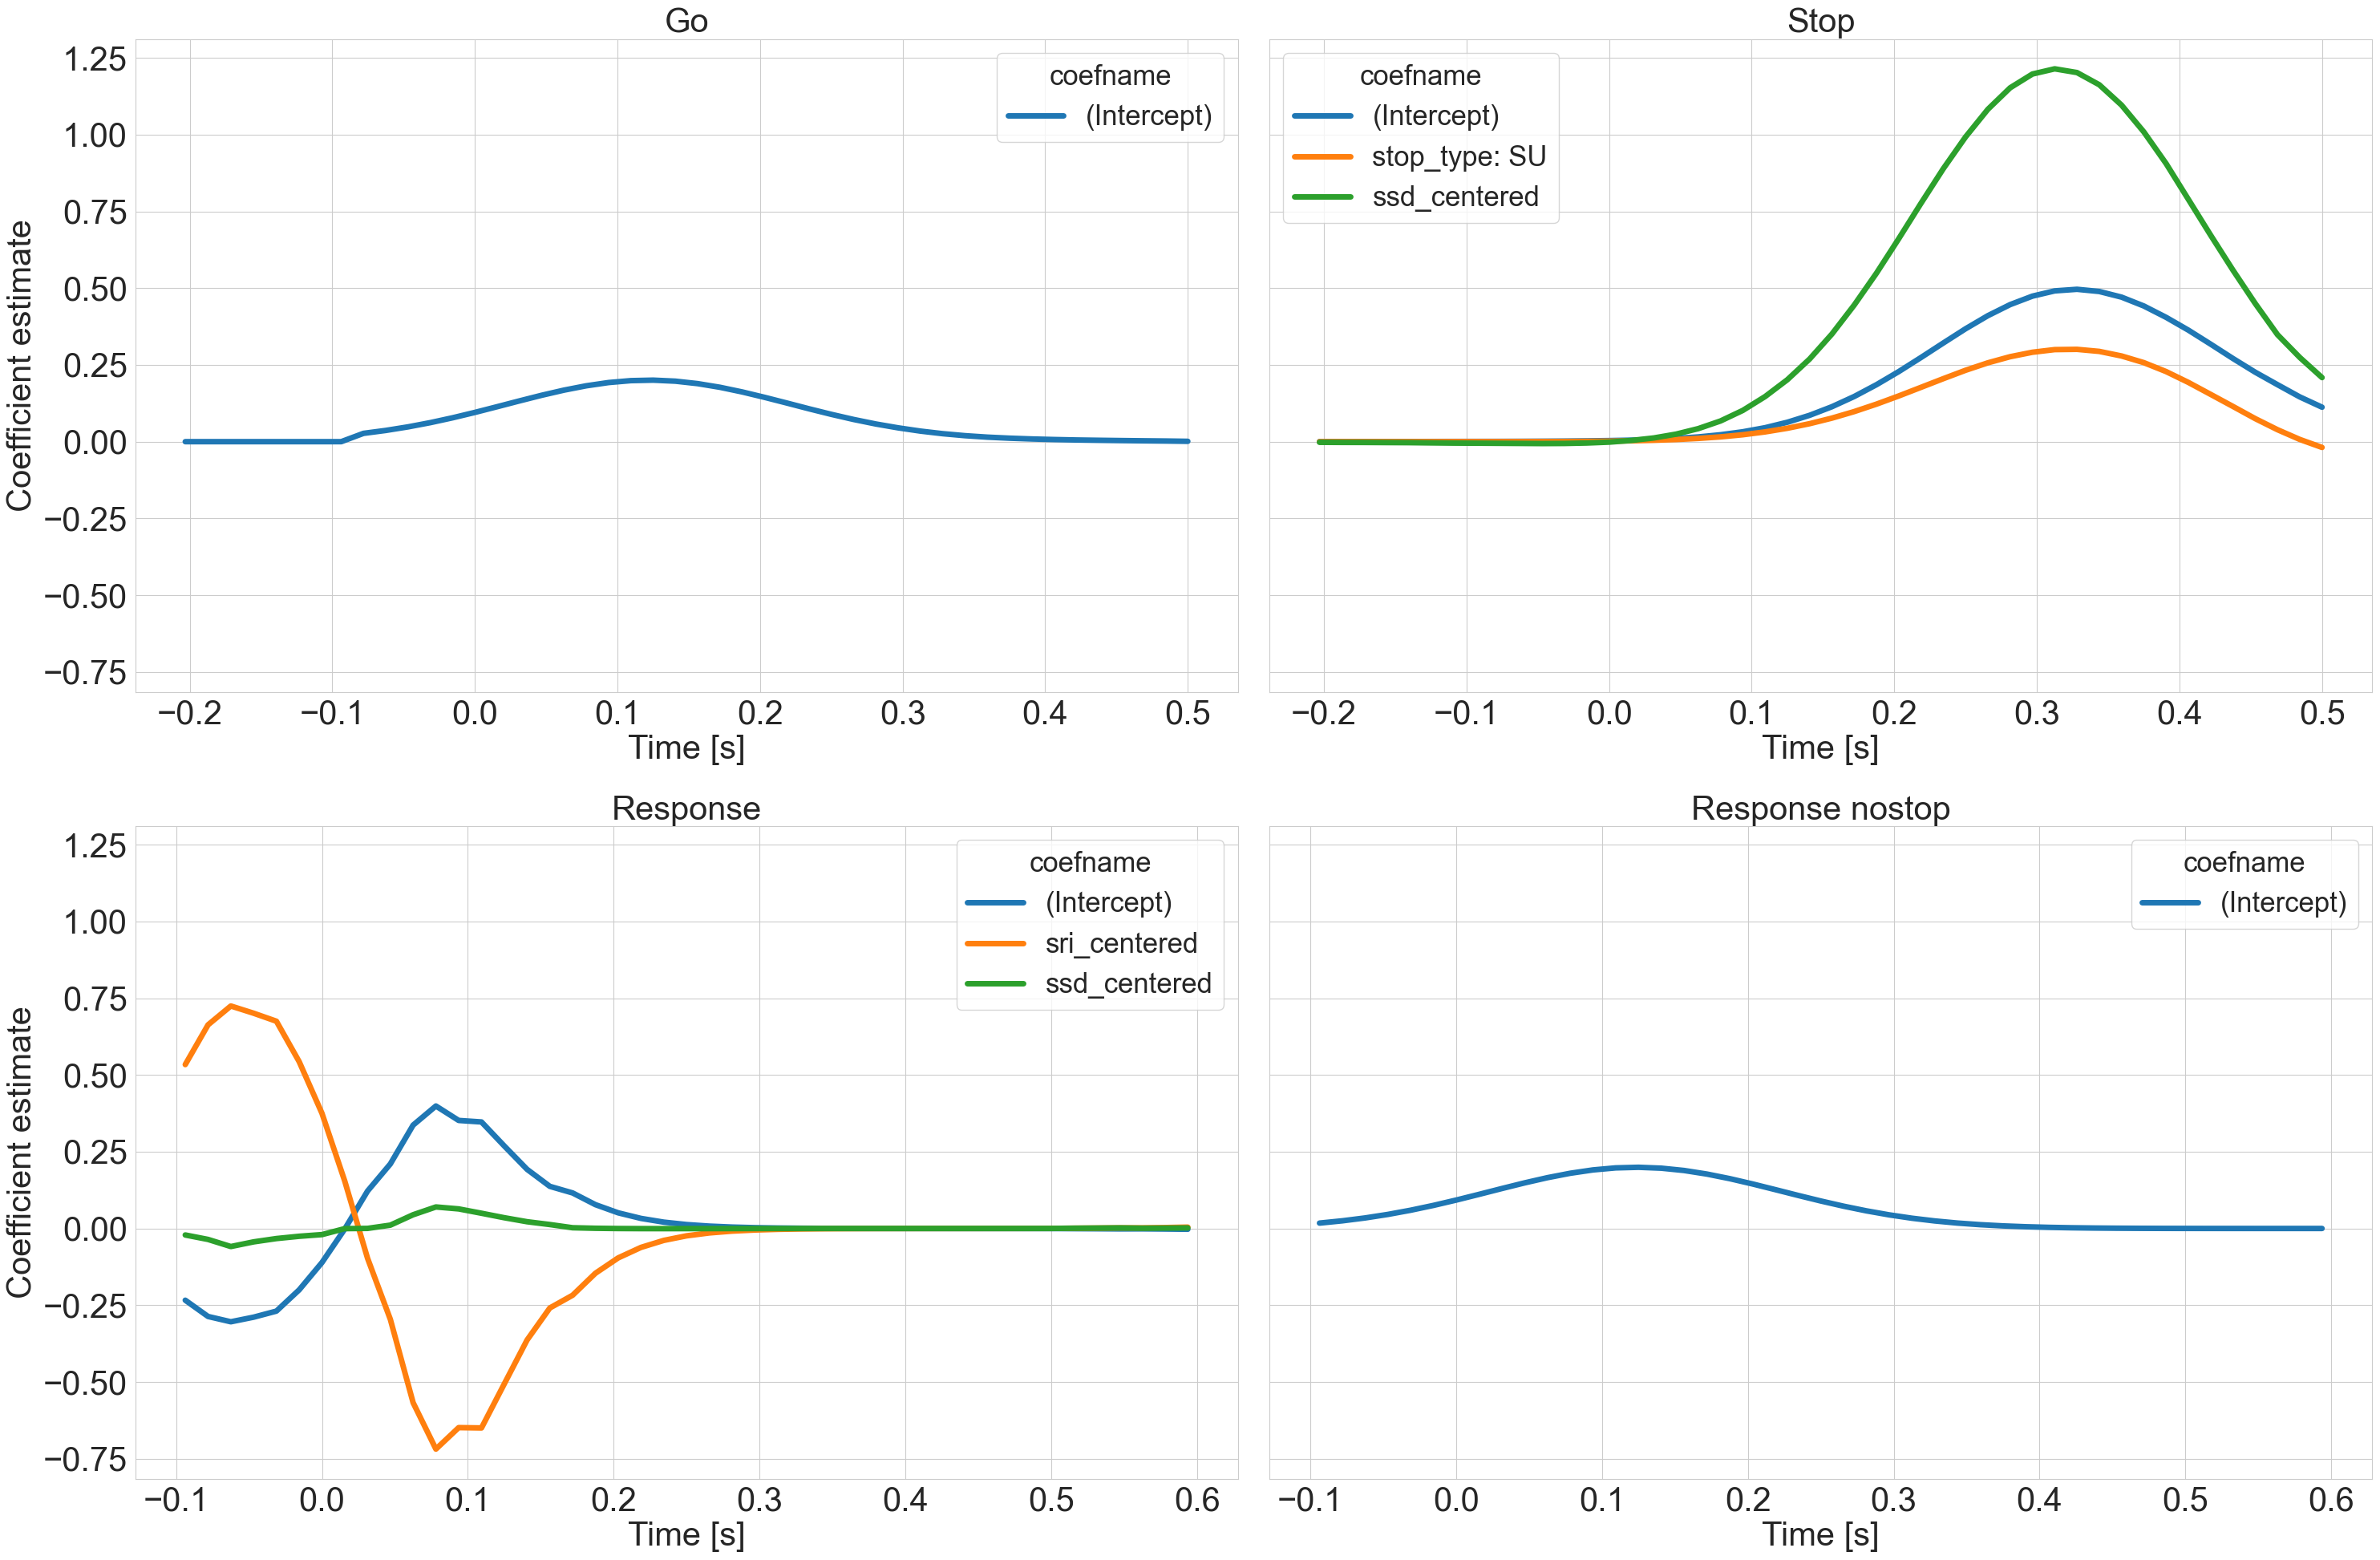

In [6]:
# Parameters
n_trials_per_ssd = 100
distances_C_A = np.arange(0.1, 0.4, 0.05)
sampling_rate = 64
noise_level = 0
duration=1.5


sri_means = [0.2, 0.3, 0.4, 0.5]

for i, sri_mean in enumerate(sri_means):
    config = {
        'go_intercept': 0.2,
        'stop_intercept': 0.5,
        'response_intercept':
            {
                'error': 1,
                'correct_nostop':0.2
            },
        'interactions': {
            'stop x SSD': True,
            'response_error x SSD': True,
            'response_error x SRI': True,
        },
        'probability': {
            'stop': 0.3,
            'error': 0.5,

        },
        'sri': {'loc': sri_mean, 'scale': 0.05}
    }

    # Simulate ERP components with conditions
    erp_trials, data_df = simulations.simulate_erp_components_with_conditions_test(
        n_trials_per_ssd,
        distances_C_A,
        config,
        sampling_rate,
        noise_level,
        duration=duration,
        stop_diff=True,
        remove_ern=True,
        stop_component_offset = .2,
    )

    # create Unfold events dataset
    events_df = simulations.create_events_table(data_df, duration, sampling_rate)

    # perform unfolding
    results = unfold_utils.perform_unfold(events_df, erp_trials)

    # plot results
    print(f'SRI mean: {sri_mean}')
    plt.figure(i)
    unfold_utils.plot_unfold_results_sst(results)


SRI mean: 0.2


<Figure size 640x480 with 0 Axes>

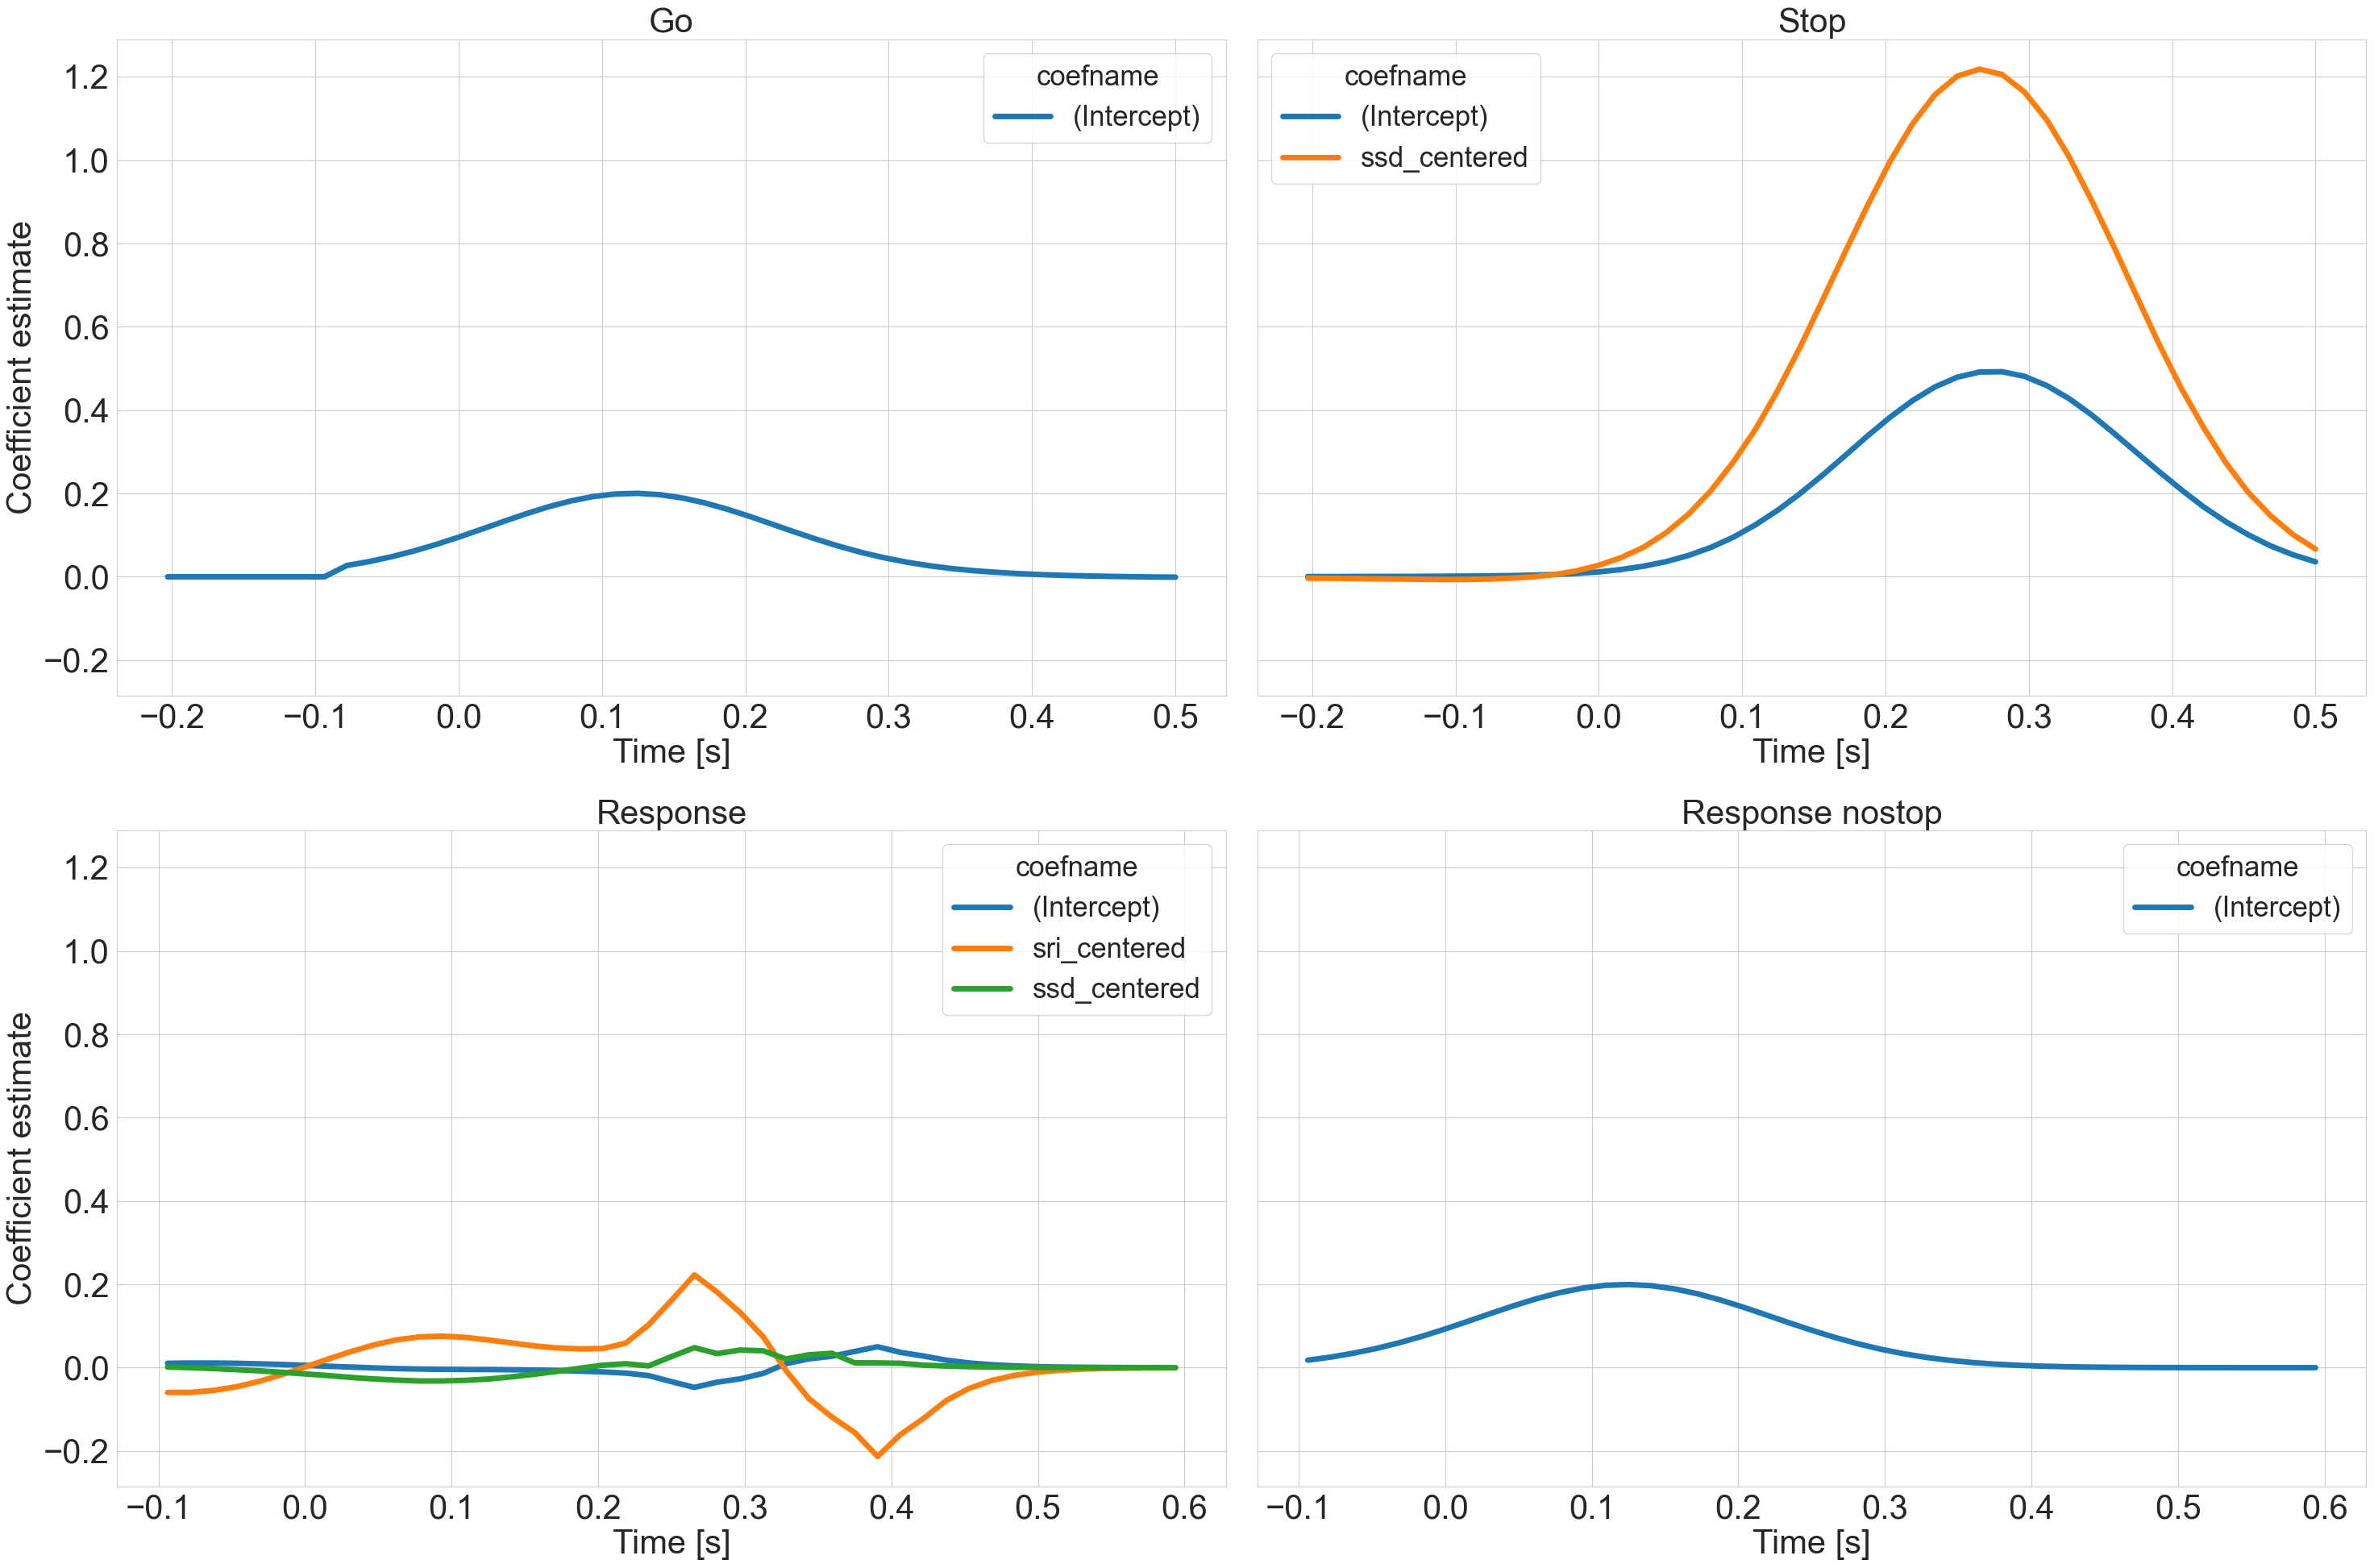

SRI mean: 0.3


<Figure size 640x480 with 0 Axes>

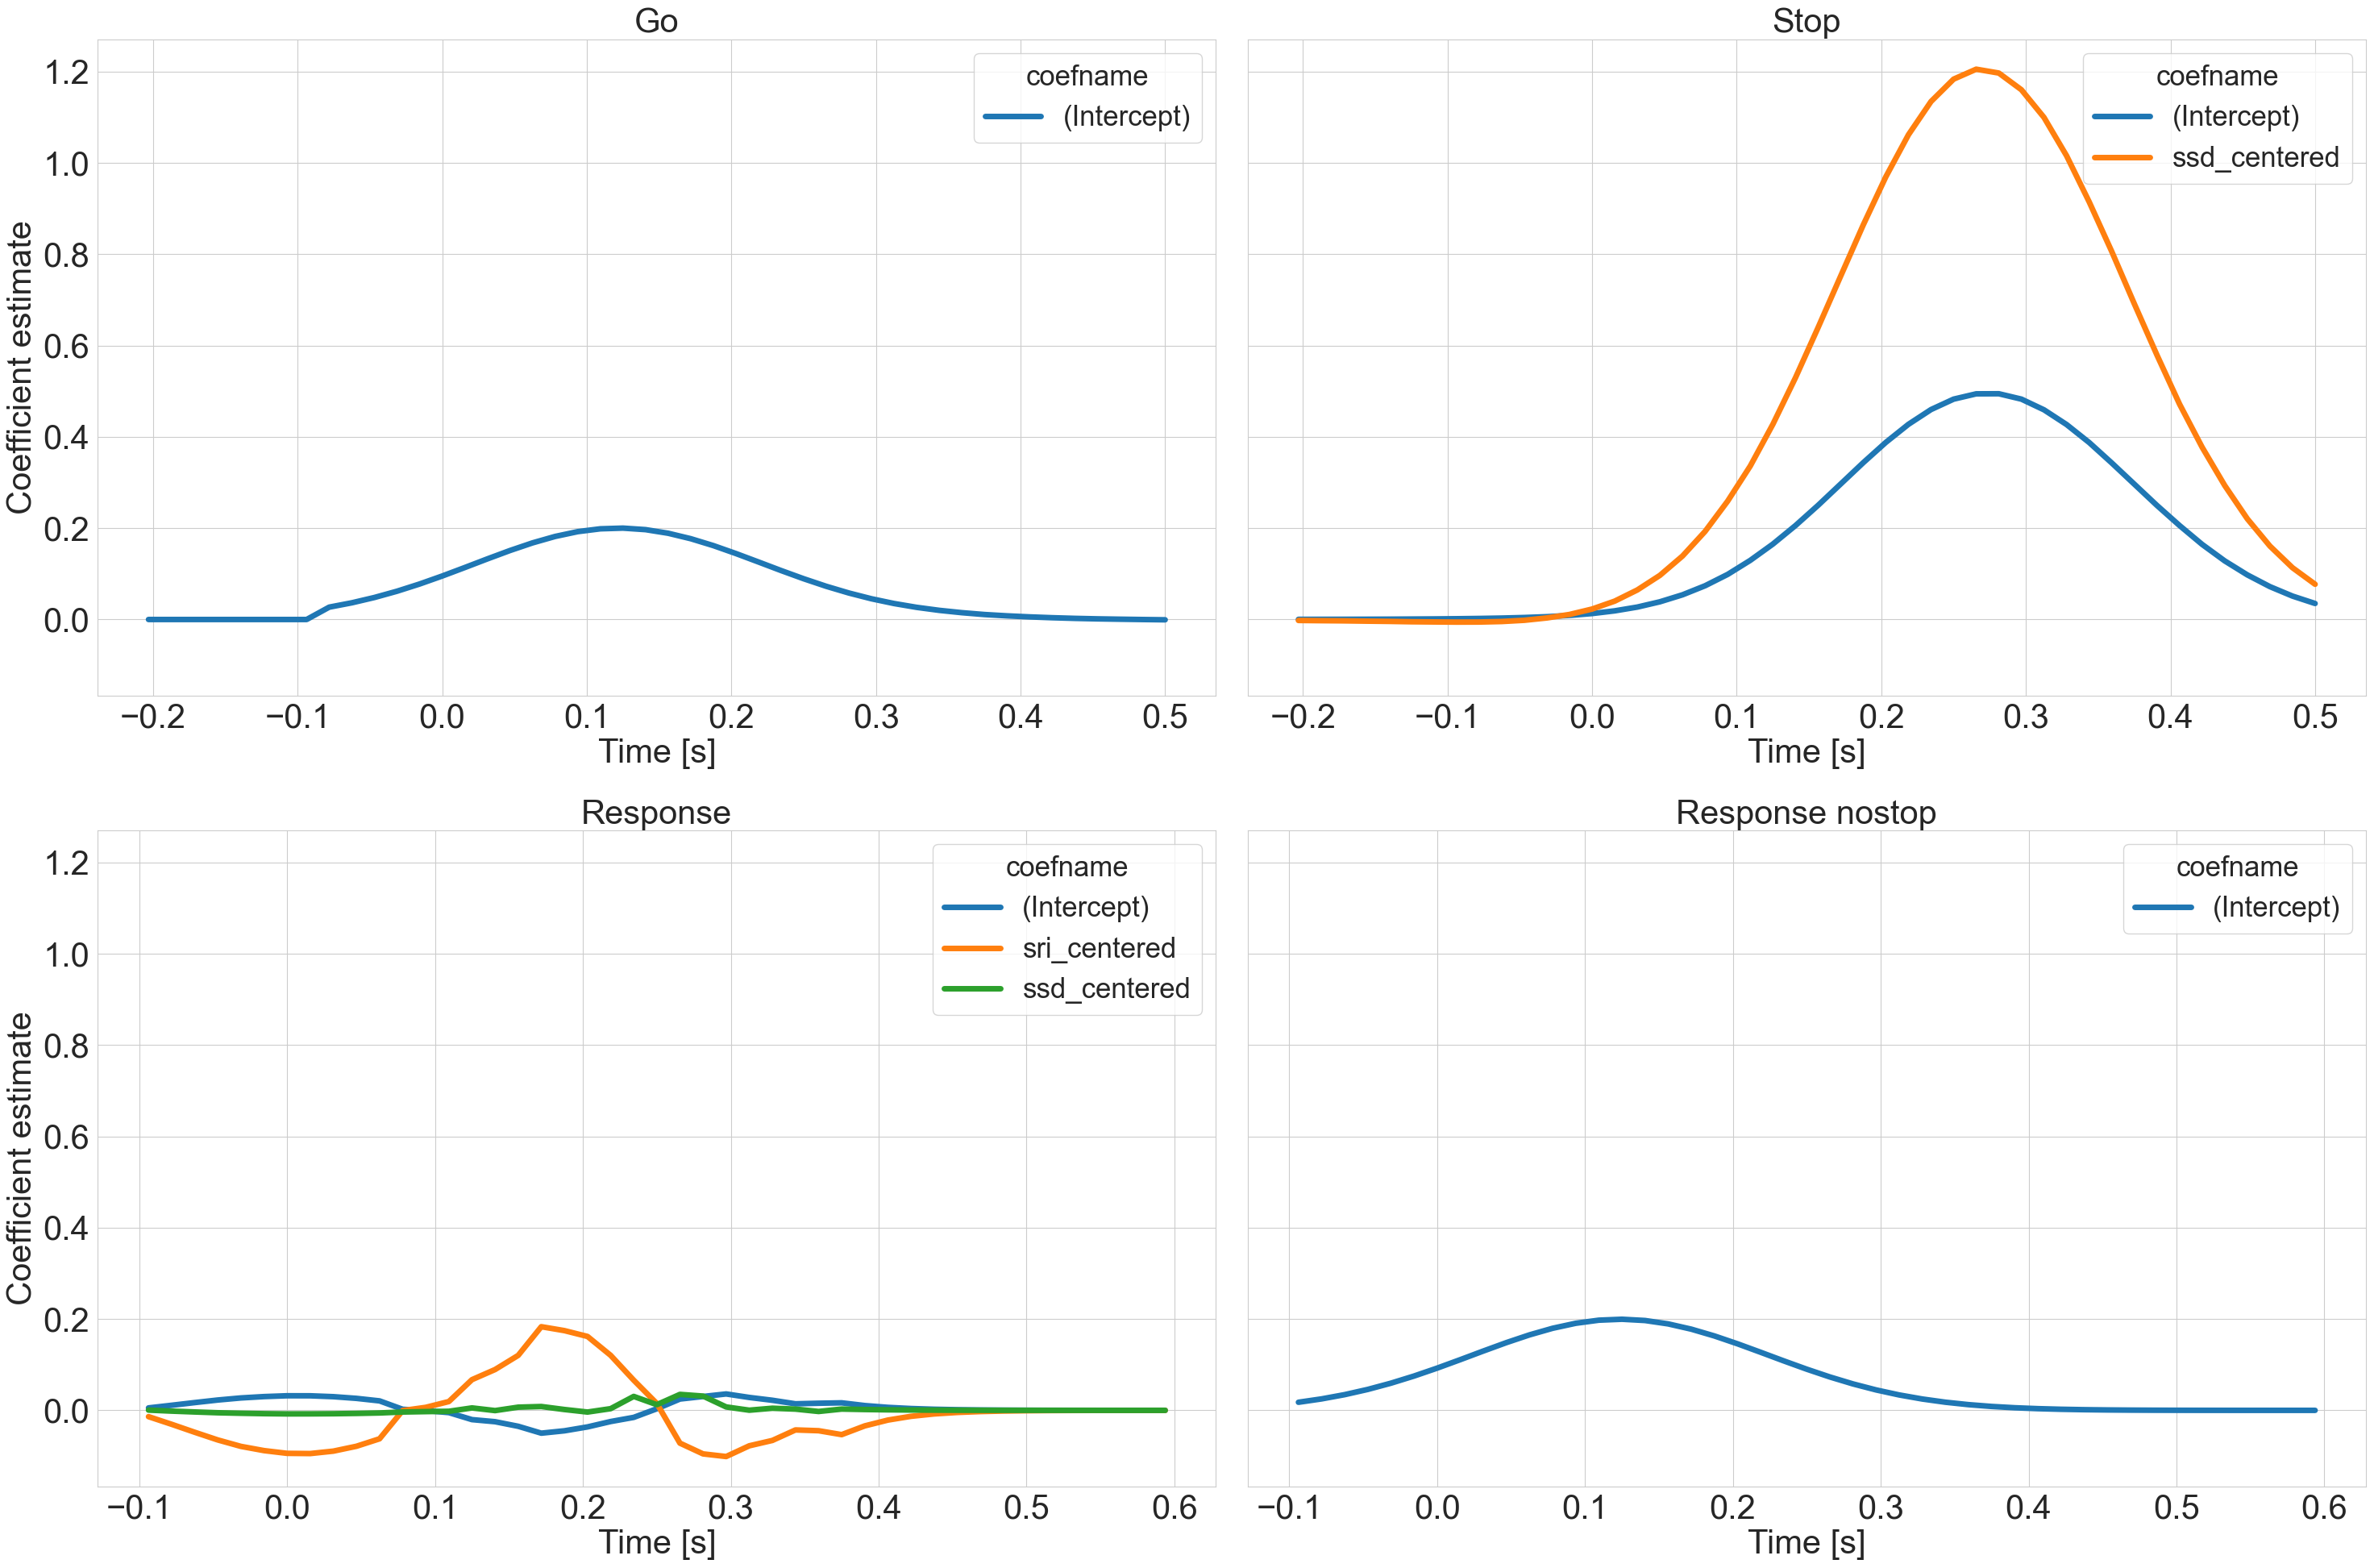

SRI mean: 0.4


<Figure size 640x480 with 0 Axes>

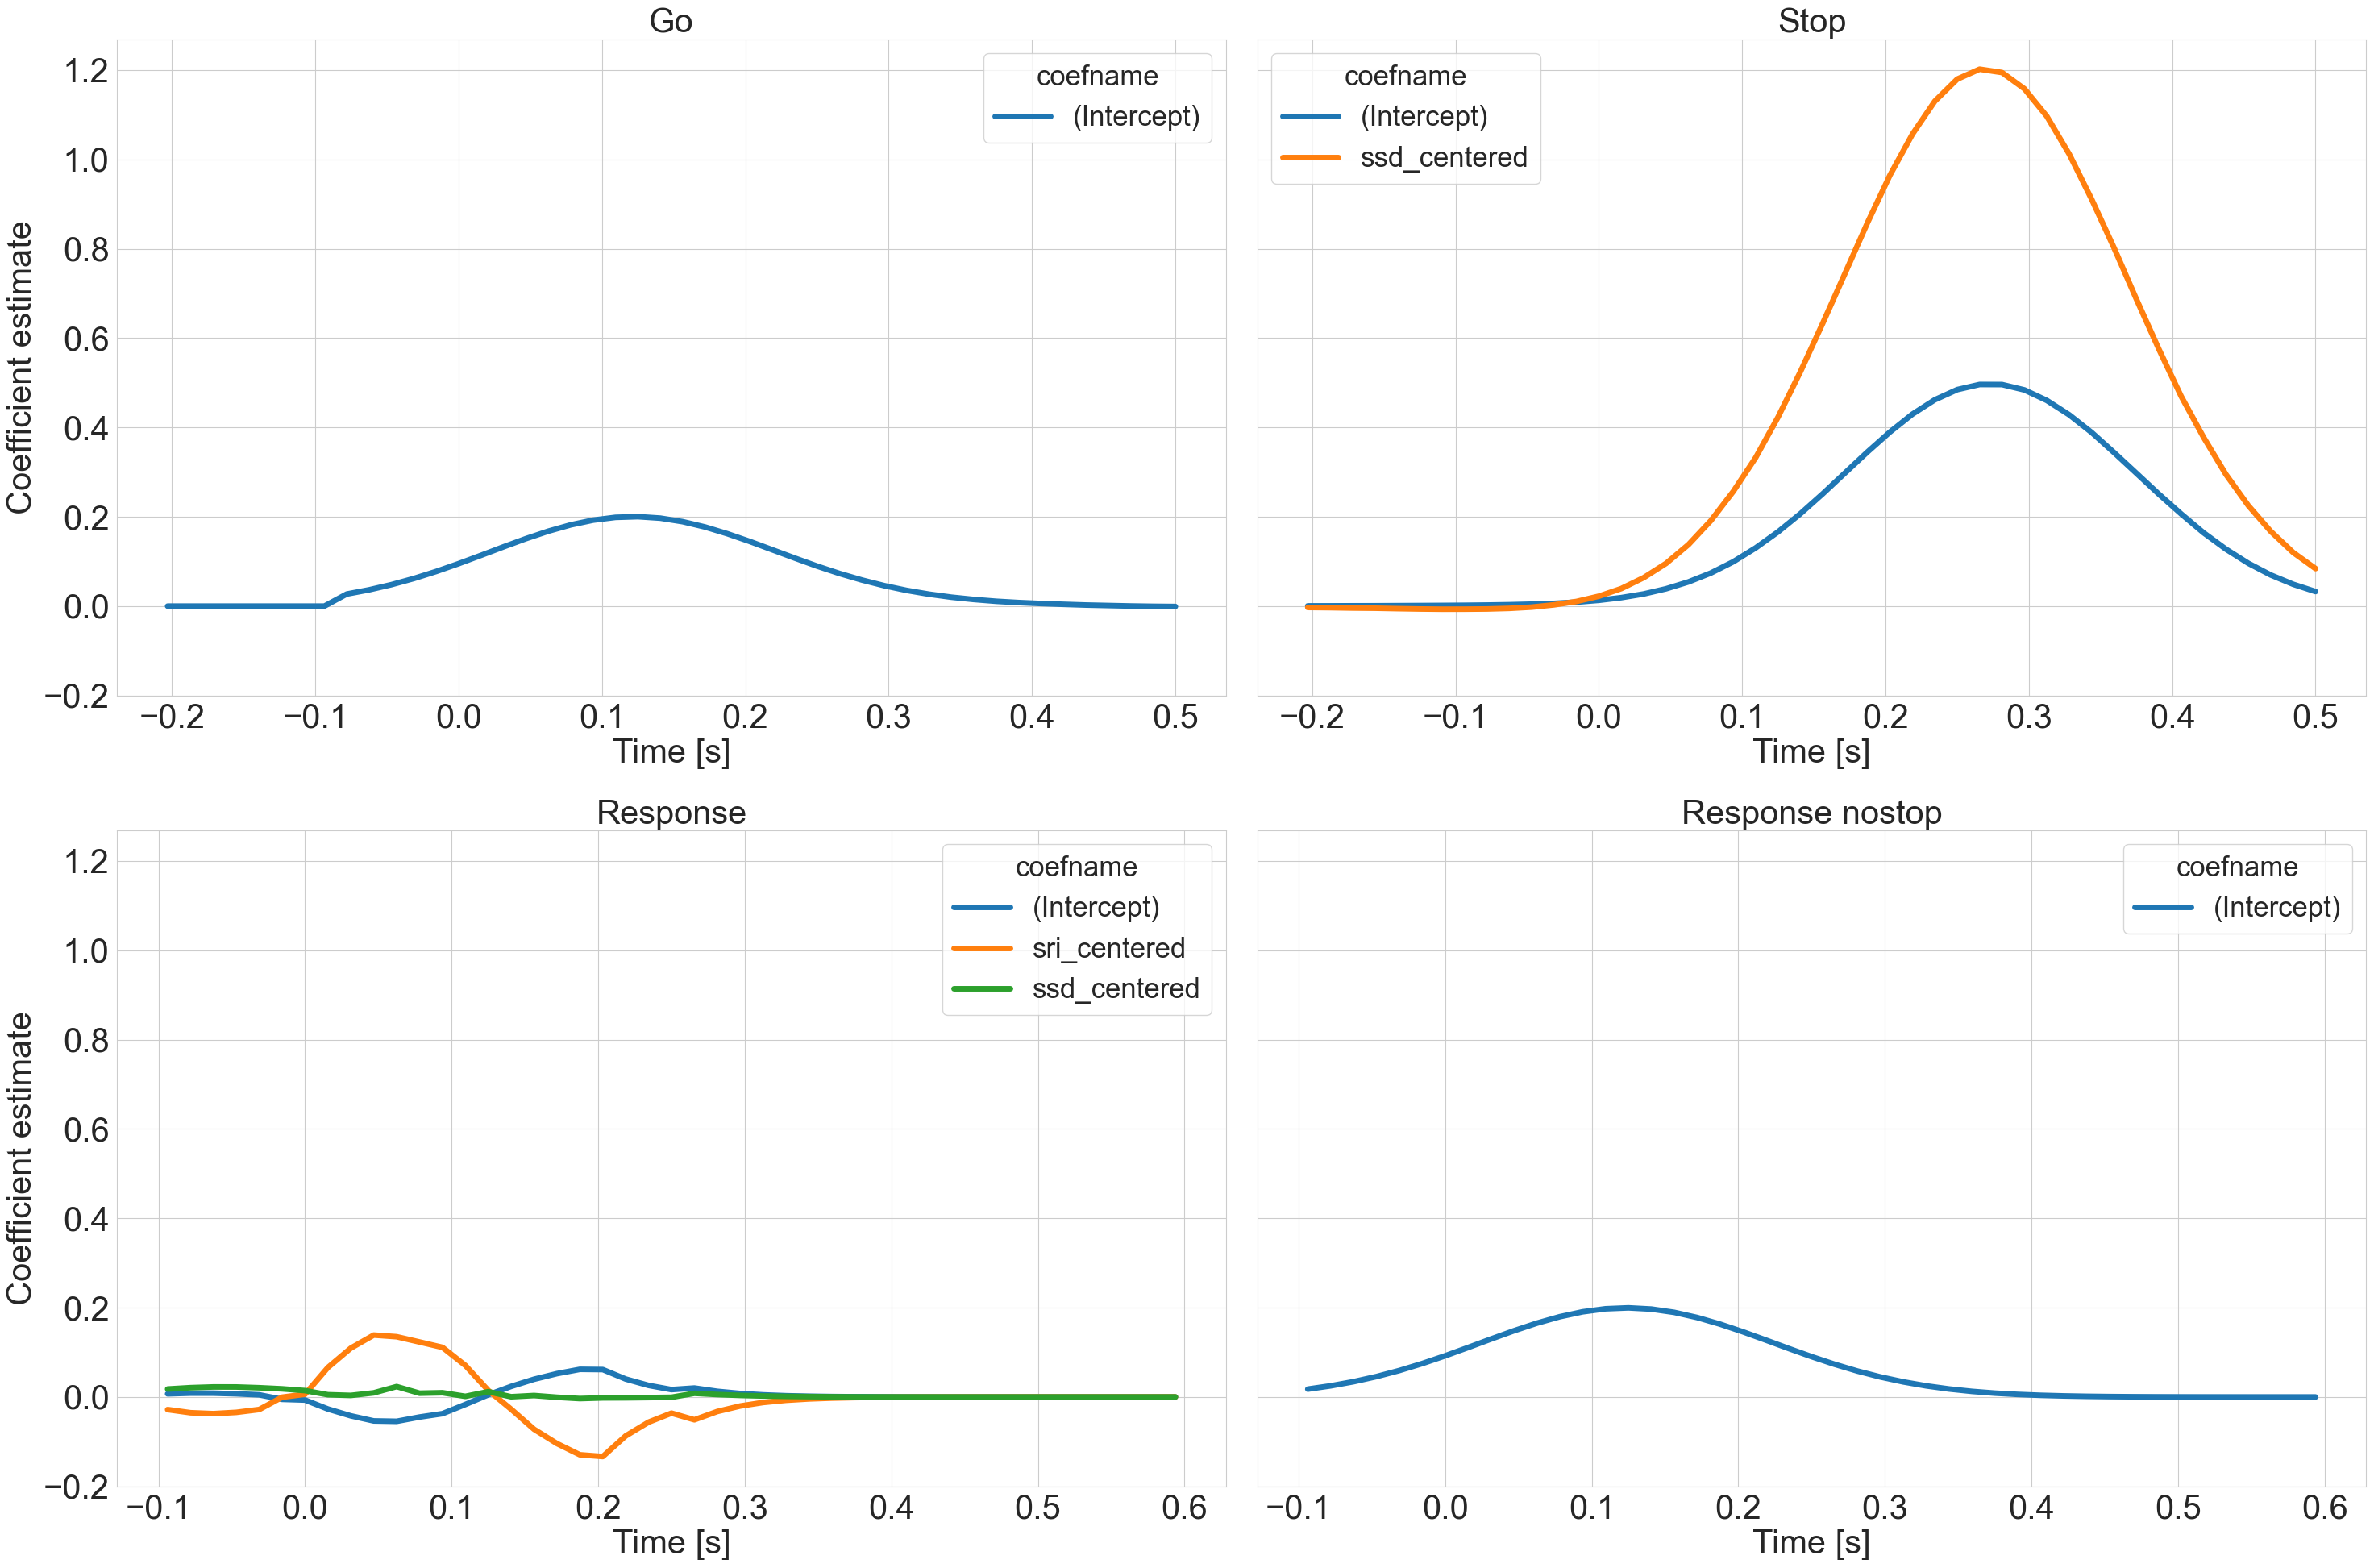

SRI mean: 0.5


<Figure size 640x480 with 0 Axes>

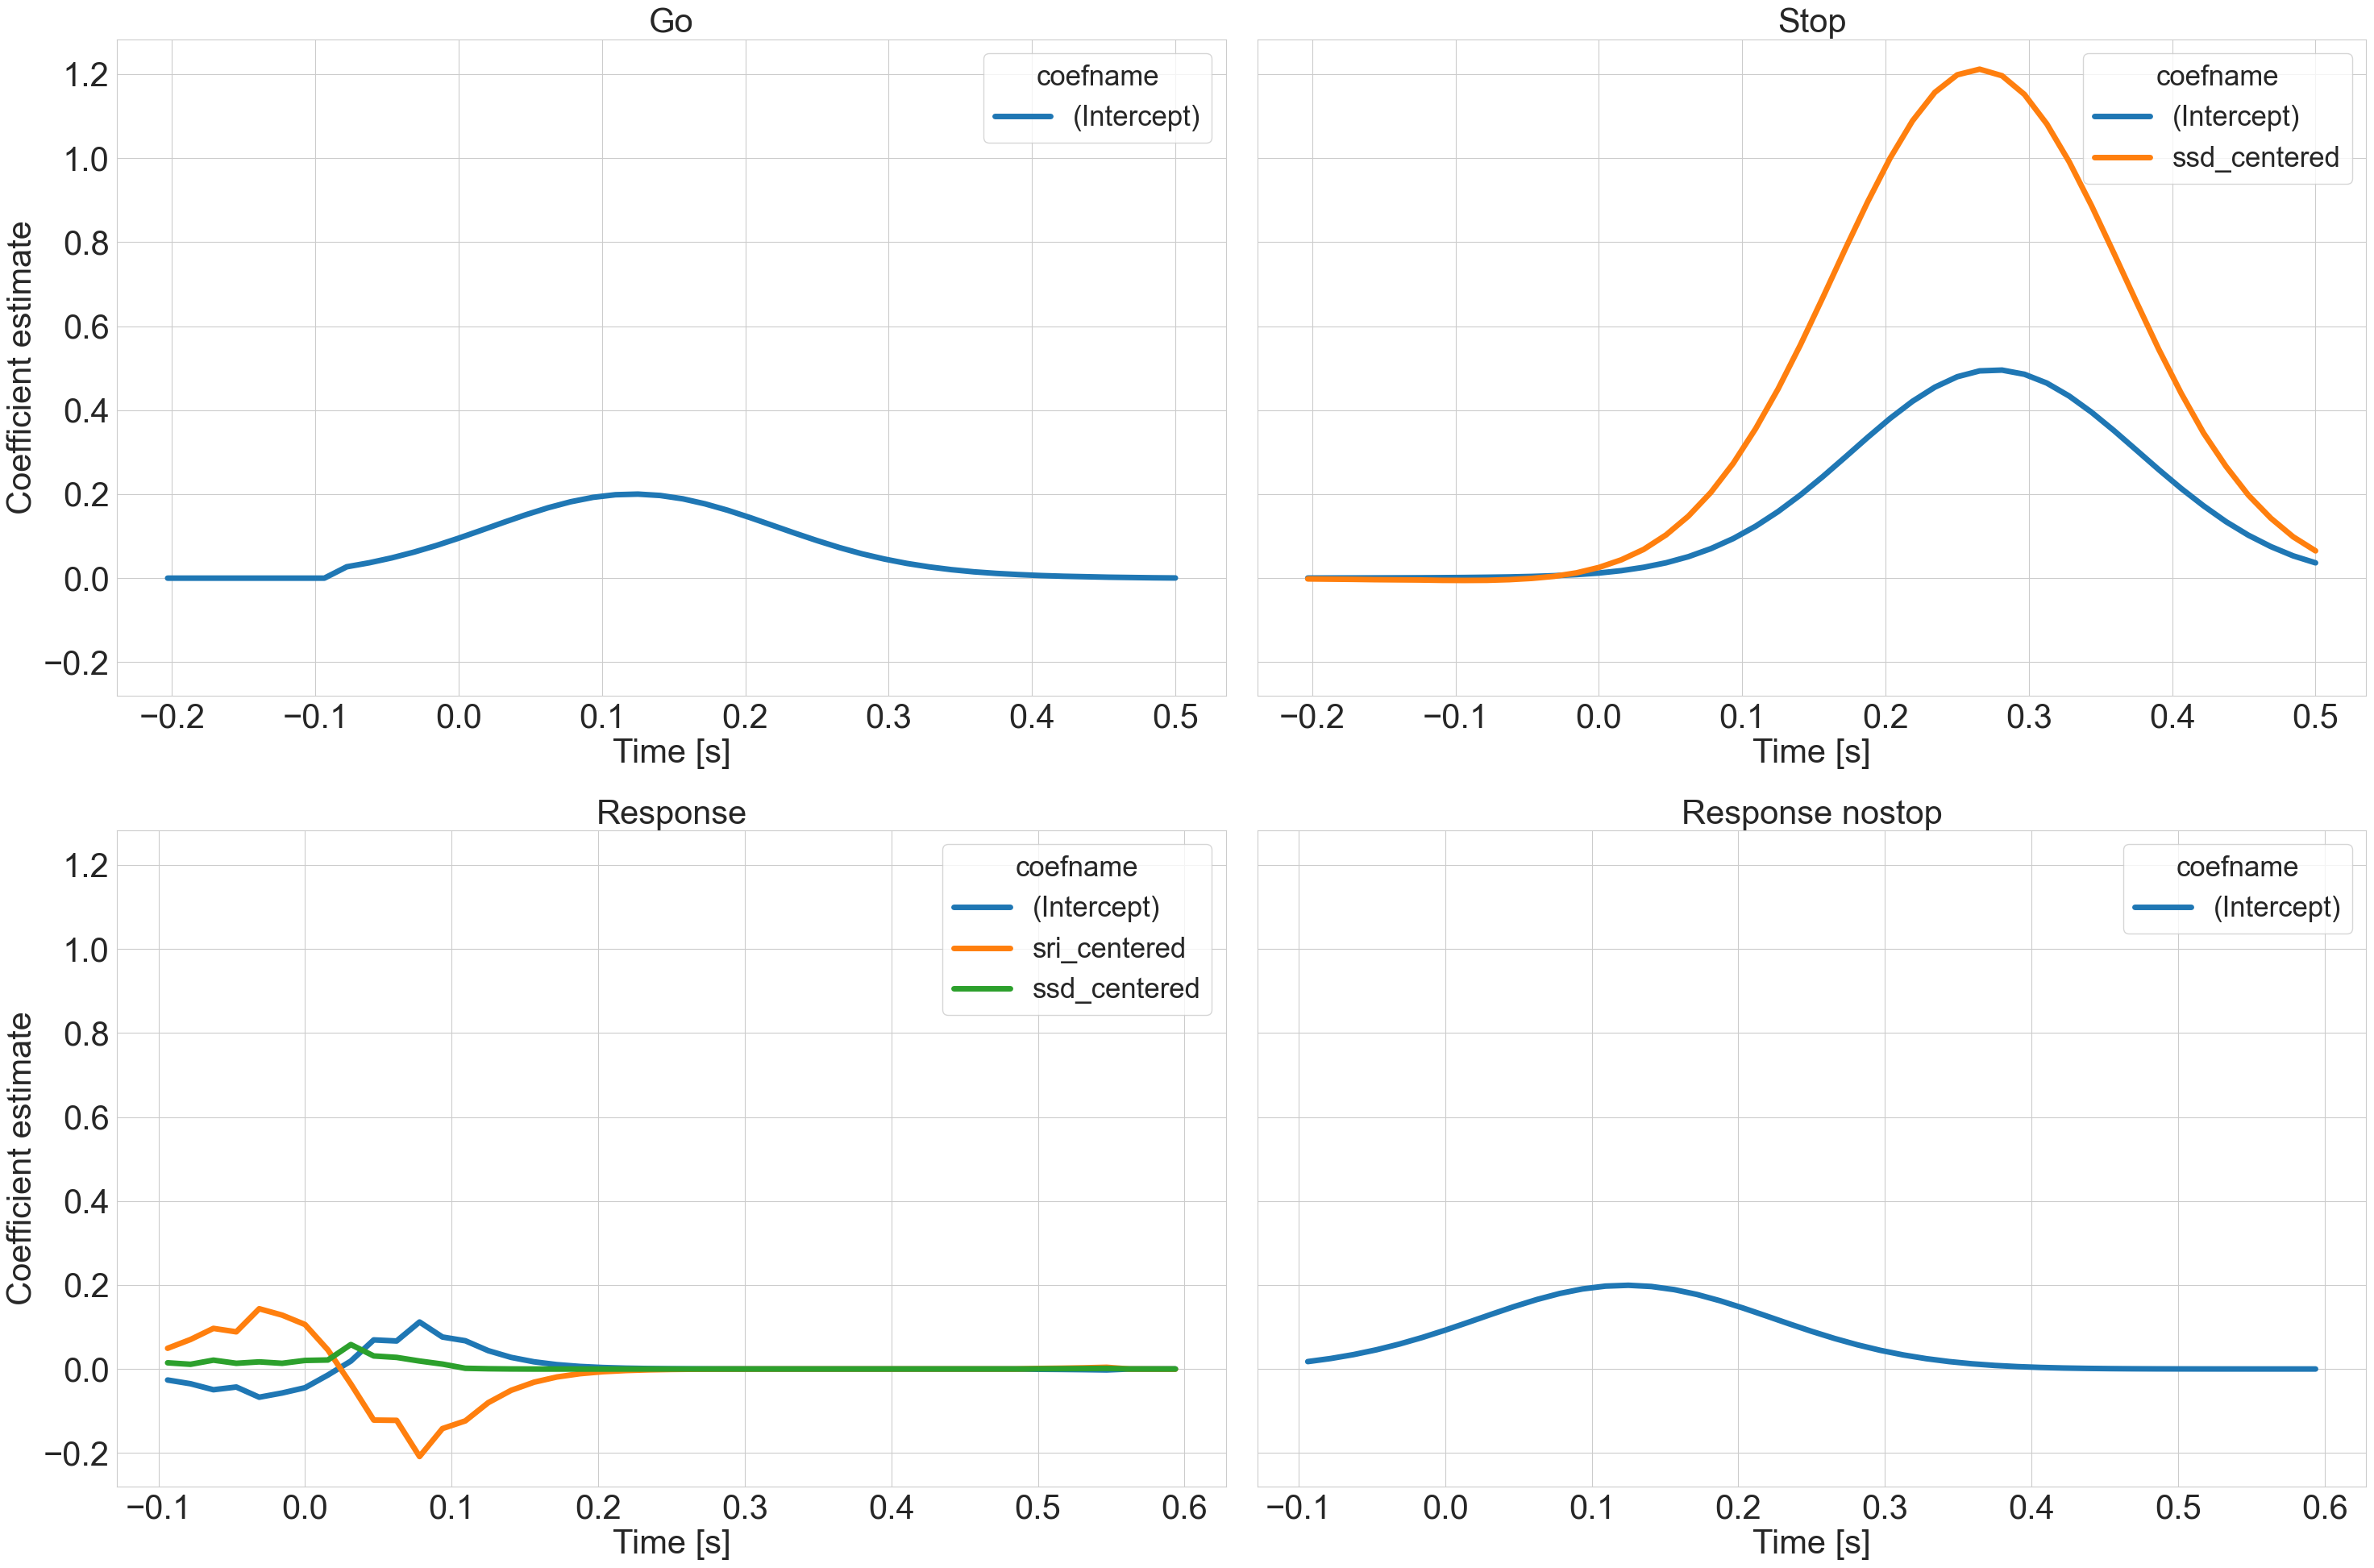

In [23]:
# Parameters
n_trials_per_ssd = 100
distances_C_A = np.arange(0.1, 0.4, 0.05)
sampling_rate = 64
noise_level = 0
duration=1.5


sri_means = [0.2, 0.3, 0.4, 0.5]

for i, sri_mean in enumerate(sri_means):
    config = {
        'go_intercept': 0.2,
        'stop_intercept': 0.5,
        'response_intercept':
            {
                'error': 1,
                'correct_nostop':0.2
            },
        'interactions': {
            'stop x SSD': True,
            'response_error x SSD': False,
            'response_error x SRI': False,
        },
        'probability': {
            'stop': 0.3,
            'error': 0.5,

        },
        'sri': {'loc': sri_mean, 'scale': 0.05}
    }

    # Simulate ERP components with conditions
    erp_trials, data_df = simulations.simulate_erp_components_with_conditions_test(
        n_trials_per_ssd,
        distances_C_A,
        config,
        sampling_rate,
        noise_level,
        duration=duration,
        stop_diff=False,
        remove_ern=True,
        stop_component_offset = .15,
    )

    # create Unfold events dataset
    events_df = simulations.create_events_table(data_df, duration, sampling_rate)

    # perform unfolding
    results = unfold_utils.perform_unfold2(events_df, erp_trials)

    # plot results
    print(f'SRI mean: {sri_mean}')
    plt.figure(i)
    unfold_utils.plot_unfold_results_sst(results)
